In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Parameters

In [8]:
TF2 = 7
NTest = 96
NVal = 100
T1 = 14
D = 15

In [3]:
def split_X_Y(ar, T, TF):
  X = []
  Y = []
  for t in range(len(ar) - T - TF + 1):
    x = ar[t : t + T, 0: -1]
    X.append(x)
    y = ar[t + T : t + T + TF, -1:]
    Y.append(y)

  X = np.array(X).astype(float) 
  if TF == 1:
    Y = np.array(Y).astype(float).reshape(len(Y), )
  else:
    Y = np.array(Y).astype(float).reshape(len(Y), TF)
  print("X.shape", X.shape, "Y.shape", Y.shape) 
  return X, Y

In [4]:
def feature_selection(x_train, y_train):
  rfe = RFE(RandomForestRegressor(), n_features_to_select=18)
  fit = rfe.fit(x_train.reshape(len(x_train),D*T1), y_train)
  important_features = list()
  for i in range(len(fit.support_)):
      if fit.support_[i]:
          important_features.append(i)
  result = np.array(important_features)
  calMostFeature = [0]*D
  for i in result:
    calMostFeature[i%D] = calMostFeature[i%D] + 1
  print(calMostFeature)
  # top_idx =  np.sort(np.argsort(calMostFeature)[-NFeature:])
  return calMostFeature

In [5]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score
from statistics import mean 

In [25]:
def split_y_y(y):
    y_0 = []
    y_1 = []
    y_2 = []
    y_3 = []
    y_4 = []
    y_5 = []
    y_6 = []
    for i in range(0, len(y)):
        y_0.append(y[i][0])
        y_1.append(y[i][1])
        y_2.append(y[i][2])
        y_3.append(y[i][3])
        y_4.append(y[i][4])
        y_5.append(y[i][5])
        y_6.append(y[i][6])
    return np.array(y_0), np.array(y_1), np.array(y_2), np.array(y_3), np.array(y_4), np.array(y_5), np.array(y_6)

In [26]:
def deviation_function(y, pred):
  deviation_0 = []
  deviation_1 = []
  deviation_2= []
  deviation_3 = []
  deviation_4 = []
  deviation_5 = []
  deviation_6 = []
  for i in range(0, len(y)):
      deviation_0.append(abs(pred[i][0] - y[i][0]) / y[i][0])
      deviation_1.append(abs(pred[i][1] - y[i][1]) / y[i][1])
      deviation_2.append(abs(pred[i][2] - y[i][2]) / y[i][2])
      deviation_3.append(abs(pred[i][3] - y[i][3]) / y[i][3])
      deviation_4.append(abs(pred[i][4] - y[i][4]) / y[i][4])
      deviation_5.append(abs(pred[i][5] - y[i][5]) / y[i][5])
      deviation_6.append(abs(pred[i][6] - y[i][6]) / y[i][6])
  return (mean(deviation_0) + mean(deviation_1))/TF2
def deviation_function_inv(y, pred):
  deviation_0 = []
  deviation_1 = []
  deviation_2= []
  deviation_3 = []
  deviation_4 = []
  deviation_5 = []
  deviation_6 = []
  for i in range(0, len(y)):
      deviation_0.append(abs(pred[i][0] - y[i][0]) / y[i][0])
      deviation_1.append(abs(pred[i][1] - y[i][1]) / y[i][1])
      deviation_2.append(abs(pred[i][2] - y[i][2]) / y[i][2])
      deviation_3.append(abs(pred[i][3] - y[i][3]) / y[i][3])
      deviation_4.append(abs(pred[i][4] - y[i][4]) / y[i][4])
      deviation_5.append(abs(pred[i][5] - y[i][5]) / y[i][5])
      deviation_6.append(abs(pred[i][6] - y[i][6]) / y[i][6])
  return ((np.array(deviation_0).mean()) + (np.array(deviation_1).mean()) + (np.array(deviation_2).mean()) + (np.array(deviation_3).mean()) +(np.array(deviation_4).mean()) + (np.array(deviation_5).mean())+ (np.array(deviation_6).mean()))/TF2

In [27]:
def deviation_function_sarimax(y, pred_0, pred_1, pred_2, pred_3, pred_4, pred_5, pred_6):
  deviation_0 = []
  deviation_1 = []
  deviation_2= []
  deviation_3 = []
  deviation_4 = []
  deviation_5 = []
  deviation_6 = []
  for i in range(0, len(y)):
      deviation_0.append(abs(pred_0[i] - y[i][0]) / y[i][0])
      deviation_1.append(abs(pred_1[i] - y[i][1]) / y[i][1])
      deviation_2.append(abs(pred_2[i] - y[i][2]) / y[i][2])
      deviation_3.append(abs(pred_3[i] - y[i][3]) / y[i][3])
      deviation_4.append(abs(pred_4[i] - y[i][4]) / y[i][4])
      deviation_5.append(abs(pred_5[i] - y[i][5]) / y[i][5])
      deviation_6.append(abs(pred_6[i] - y[i][6]) / y[i][6])
  return (mean(deviation_0) + mean(deviation_1))/TF2
def deviation_function_sarimax_inv(y, pred_0, pred_1, pred_2, pred_3, pred_4, pred_5, pred_6):
  deviation_0 = []
  deviation_1 = []
  deviation_2= []
  deviation_3 = []
  deviation_4 = []
  deviation_5 = []
  deviation_6 = []
  for i in range(0, len(y)):
      deviation_0.append(abs(pred_0[i] - y[i][0]) / y[i][0])
      deviation_1.append(abs(pred_1[i] - y[i][1]) / y[i][1])
      deviation_2.append(abs(pred_2[i] - y[i][2]) / y[i][2])
      deviation_3.append(abs(pred_3[i] - y[i][3]) / y[i][3])
      deviation_4.append(abs(pred_4[i] - y[i][4]) / y[i][4])
      deviation_5.append(abs(pred_5[i] - y[i][5]) / y[i][5])
      deviation_6.append(abs(pred_6[i] - y[i][6]) / y[i][6])
  return (mean(np.array(deviation_0).mean(axis=1)) + mean(np.array(deviation_1).mean(axis=1)) + mean(np.array(deviation_2).mean(axis=1)) + mean(np.array(deviation_3).mean(axis=1)) + mean(np.array(deviation_4).mean(axis=1)) + mean(np.array(deviation_5).mean(axis=1))+ mean(np.array(deviation_6).mean(axis=1)))/TF2

In [29]:
def evaluation(y, pred, name_model):
    #mean squared error
    mse=mean_squared_error(y, pred)     
    #mean absolute error     
    mae=mean_absolute_error(y, pred)  
    #root mean squared error      
    rmse=np.sqrt(mean_squared_error(y, pred))
    #r2 score
    r2 = r2_score(y, pred)
    #deviation
    deviation = deviation_function(y, pred)
    print(f'mse: {mse}')
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    print(f"R-Squared: {r2}")
    print(f"Deviation: {deviation}")
    measure_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse, "r2": r2, 'deviation': deviation},index=[name_model])
    return measure_df
def evaluation_inv(y, pred, name_model):
    #mean squared error
    mse=mean_squared_error(y, pred)     
    #mean absolute error     
    mae=mean_absolute_error(y, pred)  
    #root mean squared error      
    rmse=np.sqrt(mean_squared_error(y, pred))
    #r2 score
    r2 = r2_score(y, pred)
    #deviation
    deviation = deviation_function_inv(y, pred)
    print(f'mse: {mse}')
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    print(f"R-Squared: {r2}")
    print(f"Deviation: {deviation}")
    measure_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse, "r2": r2, 'deviation': deviation},index=[name_model])
    return measure_df

In [30]:
def evalution_sarimax(y, pred_0, pred_1, pred_2, pred_3, pred_4, pred_5, pred_6, name_model):
    y_0, y_1, y_2, y_3, y_4, y_5, y_6 = split_y_y(y)
    #mean squared error
    mse_0 =mean_squared_error(y_0, pred_0)     
    #mean absolute error     
    mae_0 =mean_absolute_error(y_0, pred_0)  
    #root mean squared error      
    rmse_0 =np.sqrt(mean_squared_error(y_0, pred_0))
    #r2 score
    r2_0 = r2_score(y_0, pred_0) 
    
    #mean squared error
    mse_1 =mean_squared_error(y_1, pred_1)     
    #mean absolute error     
    mae_1 =mean_absolute_error(y_1, pred_1)  
    #root mean squared error      
    rmse_1 =np.sqrt(mean_squared_error(y_1, pred_1))
    #r2 score
    r2_1 = r2_score(y_1, pred_1) 

    #mean squared error
    mse_2 =mean_squared_error(y_2, pred_2)     
    #mean absolute error     
    mae_2 =mean_absolute_error(y_2, pred_2)  
    #root mean squared error      
    rmse_2 =np.sqrt(mean_squared_error(y_2, pred_2))
    #r2 score
    r2_2 = r2_score(y_2, pred_2) 

    #mean squared error
    mse_3 =mean_squared_error(y_3, pred_3)     
    #mean absolute error     
    mae_3 =mean_absolute_error(y_3, pred_3)  
    #root mean squared error      
    rmse_3 =np.sqrt(mean_squared_error(y_3, pred_3))
    #r2 score
    r2_3 = r2_score(y_3, pred_3) 

    #mean squared error
    mse_4 =mean_squared_error(y_4, pred_4)     
    #mean absolute error     
    mae_4 =mean_absolute_error(y_4, pred_4)  
    #root mean squared error      
    rmse_4 =np.sqrt(mean_squared_error(y_4, pred_4))
    #r2 score
    r2_4 = r2_score(y_4, pred_4)  

    #mean squared error
    mse_5 =mean_squared_error(y_5, pred_5)     
    #mean absolute error     
    mae_5 =mean_absolute_error(y_5, pred_5)  
    #root mean squared error      
    rmse_5 =np.sqrt(mean_squared_error(y_5, pred_5))
    #r2 score
    r2_5 = r2_score(y_5, pred_5)  

    #mean squared error
    mse_6 =mean_squared_error(y_6, pred_6)     
    #mean absolute error     
    mae_6 =mean_absolute_error(y_6, pred_6)  
    #root mean squared error      
    rmse_6 =np.sqrt(mean_squared_error(y_6, pred_6))
    #r2 score
    r2_6 = r2_score(y_6, pred_6) 

    #mean squared error
    mse =(mse_0 + mse_1 + mse_2 + mse_3 + mse_4 + mse_5 + mse_6) / TF2  
    #mean absolute error     
    mae =(mae_0 + mae_1 + mae_2 + mae_3 + mae_4 + mae_5 + mae_6) / TF2  
    #root mean squared error      
    rmse =(rmse_0 + rmse_1 + rmse_2 + rmse_3 + rmse_4 + rmse_5 + rmse_6) / TF2  
    #r2 score
    r2 =(r2_0 + r2_1 + r2_2 + r2_3 + r2_4 + r2_5 + r2_6) / TF2  
    #deviation
    deviation = deviation_function_sarimax(y, pred_0, pred_1, pred_2, pred_3, pred_4, pred_5, pred_6)

    print(f'mse: {mse}')
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    print(f"R-Squared: {r2}")
    print(f"Deviation: {deviation}")
    measure_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse, "r2": r2, 'deviation': deviation},index=[name_model])
    return measure_df

def evalution_sarimax_inv(y, pred_0, pred_1, pred_2, pred_3, pred_4, pred_5, pred_6, name_model):
    y_0, y_1, y_2, y_3, y_4, y_5, y_6 = split_y_y(y)
    #mean squared error
    mse_0 =mean_squared_error(y_0, pred_0)     
    #mean absolute error     
    mae_0 =mean_absolute_error(y_0, pred_0)  
    #root mean squared error      
    rmse_0 =np.sqrt(mean_squared_error(y_0, pred_0))
    #r2 score
    r2_0 = r2_score(y_0, pred_0) 
    
    #mean squared error
    mse_1 =mean_squared_error(y_1, pred_1)     
    #mean absolute error     
    mae_1 =mean_absolute_error(y_1, pred_1)  
    #root mean squared error      
    rmse_1 =np.sqrt(mean_squared_error(y_1, pred_1))
    #r2 score
    r2_1 = r2_score(y_1, pred_1) 

    #mean squared error
    mse_2 =mean_squared_error(y_2, pred_2)     
    #mean absolute error     
    mae_2 =mean_absolute_error(y_2, pred_2)  
    #root mean squared error      
    rmse_2 =np.sqrt(mean_squared_error(y_2, pred_2))
    #r2 score
    r2_2 = r2_score(y_2, pred_2) 

    #mean squared error
    mse_3 =mean_squared_error(y_3, pred_3)     
    #mean absolute error     
    mae_3 =mean_absolute_error(y_3, pred_3)  
    #root mean squared error      
    rmse_3 =np.sqrt(mean_squared_error(y_3, pred_3))
    #r2 score
    r2_3 = r2_score(y_3, pred_3) 

    #mean squared error
    mse_4 =mean_squared_error(y_4, pred_4)     
    #mean absolute error     
    mae_4 =mean_absolute_error(y_4, pred_4)  
    #root mean squared error      
    rmse_4 =np.sqrt(mean_squared_error(y_4, pred_4))
    #r2 score
    r2_4 = r2_score(y_4, pred_4)  

    #mean squared error
    mse_5 =mean_squared_error(y_5, pred_5)     
    #mean absolute error     
    mae_5 =mean_absolute_error(y_5, pred_5)  
    #root mean squared error      
    rmse_5 =np.sqrt(mean_squared_error(y_5, pred_5))
    #r2 score
    r2_5 = r2_score(y_5, pred_5)  

    #mean squared error
    mse_6 =mean_squared_error(y_6, pred_6)     
    #mean absolute error     
    mae_6 =mean_absolute_error(y_6, pred_6)  
    #root mean squared error      
    rmse_6 =np.sqrt(mean_squared_error(y_6, pred_6))
    #r2 score
    r2_6 = r2_score(y_6, pred_6) 

    #mean squared error
    mse =(mse_0 + mse_1 + mse_2 + mse_3 + mse_4 + mse_5 + mse_6) / TF2  
    #mean absolute error     
    mae =(mae_0 + mae_1 + mae_2 + mae_3 + mae_4 + mae_5 + mae_6) / TF2  
    #root mean squared error      
    rmse =(rmse_0 + rmse_1 + rmse_2 + rmse_3 + rmse_4 + rmse_5 + rmse_6) / TF2  
    #r2 score
    r2 =(r2_0 + r2_1 + r2_2 + r2_3 + r2_4 + r2_5 + r2_6) / TF2  
    #deviation
    deviation = deviation_function_sarimax_inv(y, pred_0, pred_1, pred_2, pred_3, pred_4, pred_5, pred_6)

    print(f'mse: {mse}')
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    print(f"R-Squared: {r2}")
    print(f"Deviation: {deviation}")
    measure_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse, "r2": r2, 'deviation': deviation},index=[name_model])
    return measure_df

# Normalization Dataset

In [31]:
df_normalize = pd.read_csv("G:/My Drive/CNTMDT/_Final/Dataset/normalization.csv", parse_dates=['Date'], index_col=0)
df_normalize.head(15)

,Gold_Close,Oil_Close,Volume_Top2,Volume_Top3,Volume_Top4,Volume_Top5,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
Date,,,,,,,,,,,,,,,,
2020-03-12,0.195054,0.428501,0.252108,0.035745,0.666943,0.028726,0.090175,0.096398,0.215437,0.385386,0.294139,0.478063,0.760187,0.813189,0.055378,0.000000
2020-03-13,0.066875,0.429926,0.236596,0.038759,0.662361,0.030444,0.023122,0.096398,0.145379,0.473294,0.327844,0.241249,0.699492,0.549101,0.038502,0.009472
2020-03-14,0.066875,0.429926,0.224523,0.036015,0.668942,0.030070,0.027929,0.096398,0.153463,0.453264,0.315684,0.060818,0.682915,0.560035,0.160002,0.003668
2020-03-15,0.066875,0.429926,0.241015,0.036838,0.654064,0.026986,0.015865,0.096398,0.129212,0.405045,0.227655,0.267530,0.500701,0.355787,0.267800,0.006734
2020-03-16,0.014977,0.411145,0.231549,0.033910,0.652156,0.028229,0.012953,0.096398,0.129212,0.416914,0.271336,0.282272,0.733482,0.526008,0.069977,0.000698
2020-03-17,0.082898,0.400298,0.220398,0.000000,0.030547,0.467582,0.020978,0.096398,0.139990,0.475890,0.292213,0.169911,0.727933,0.554615,0.100549,0.004071
2020-03-18,0.000000,0.359512,0.210439,0.031477,0.652130,0.025437,0.000000,0.096398,0.078015,0.504080,0.255759,0.255594,0.757136,0.384744,0.125270,0.004276
2020-03-19,0.002264,0.389574,0.213851,0.029885,0.656413,0.033121,0.014203,0.096398,0.096877,0.397626,0.333286,0.323864,0.857286,0.509011,0.131918,0.019497
2020-03-20,0.011668,0.372280,0.223185,0.030679,0.668648,0.032293,0.034210,0.096398,0.102266,0.658012,0.310209,0.158360,0.932386,0.577235,0.075954,0.019618


In [32]:
ar_original_minmax = df_normalize.to_numpy()
ar_original_minmax

array([[0.195054  , 0.4285006 , 0.25210841, ..., 0.81318927, 0.05537789,
        0.        ],
       [0.06687549, 0.42992625, 0.23659559, ..., 0.5491007 , 0.03850218,
        0.00947215],
       [0.06687549, 0.42992625, 0.22452314, ..., 0.56003522, 0.16000223,
        0.00366761],
       ...,
       [0.66997559, 0.70854771, 0.19900319, ..., 0.73869017, 0.08532489,
        0.24308976],
       [0.66997559, 0.70854771, 0.19728917, ..., 0.7039487 , 0.07841119,
        0.25020148],
       [0.66997559, 0.70854771, 0.20929626, ..., 0.50852748, 0.11842803,
        0.27466851]])

## Sliding Windows

In [33]:
x17_original_minmax, y17_original_minmax = split_X_Y(ar_original_minmax, T1, TF2)

X.shape (1076, 14, 15) Y.shape (1076, 7)


## Train Val Test

In [34]:
x17_original_minmax_train, y17_original_minmax_train = x17_original_minmax[:-NTest], y17_original_minmax[: -NTest]
x17_original_minmax_test, y17_original_minmax_test = x17_original_minmax[-NTest:], y17_original_minmax[-NTest:]

In [35]:
print(x17_original_minmax_train.shape, y17_original_minmax_train.shape )
print(x17_original_minmax_test.shape, y17_original_minmax_test.shape )

(980, 14, 15) (980, 7)
(96, 14, 15) (96, 7)


## Feature Section

In [36]:
top_idx = np.loadtxt(f"G:/My Drive/CNTMDT/_Final/FeatureSelection/{T1}_{TF2}.csv", dtype=int)
top_idx

array([0, 1, 3, 4, 6, 7, 8])

In [37]:
NFeature = len(top_idx)
NFeature 

7

In [38]:
x17_original_minmax_train = x17_original_minmax_train[:,:,top_idx]
x17_original_minmax_test = x17_original_minmax_test[:,:,top_idx]

## Build The Model

### SARIMAX

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [39]:
from sklearn.multioutput import MultiOutputRegressor

In [40]:
import statsmodels.api as sm

In [42]:
y17_original_minmax_train_0, y17_original_minmax_train_1, y17_original_minmax_train_2, y17_original_minmax_train_3, y17_original_minmax_train_4, y17_original_minmax_train_5, y17_original_minmax_train_6 = split_y_y(y17_original_minmax_train)
y17_original_minmax_test_0, y17_original_minmax_test_1, y17_original_minmax_test_2, y17_original_minmax_test_3, y17_original_minmax_test_4, y17_original_minmax_test_5, y17_original_minmax_test_6 = split_y_y(y17_original_minmax_test)

In [43]:
sarimax_mod_0 = sm.tsa.statespace.SARIMAX(y17_original_minmax_train_0, exog = x17_original_minmax_train.reshape(len(x17_original_minmax_train),NFeature*T1))
sarimax_fit_0 = sarimax_mod_0.fit()
sarimax_mod_1 = sm.tsa.statespace.SARIMAX(y17_original_minmax_train_1, exog = x17_original_minmax_train.reshape(len(x17_original_minmax_train),NFeature*T1))
sarimax_fit_1 = sarimax_mod_1.fit()
sarimax_mod_2 = sm.tsa.statespace.SARIMAX(y17_original_minmax_train_2, exog = x17_original_minmax_train.reshape(len(x17_original_minmax_train),NFeature*T1))
sarimax_fit_2 = sarimax_mod_2.fit()
sarimax_mod_3 = sm.tsa.statespace.SARIMAX(y17_original_minmax_train_3, exog = x17_original_minmax_train.reshape(len(x17_original_minmax_train),NFeature*T1))
sarimax_fit_3 = sarimax_mod_3.fit()
sarimax_mod_4 = sm.tsa.statespace.SARIMAX(y17_original_minmax_train_4, exog = x17_original_minmax_train.reshape(len(x17_original_minmax_train),NFeature*T1))
sarimax_fit_4 = sarimax_mod_4.fit()
sarimax_mod_5 = sm.tsa.statespace.SARIMAX(y17_original_minmax_train_5, exog = x17_original_minmax_train.reshape(len(x17_original_minmax_train),NFeature*T1))
sarimax_fit_5 = sarimax_mod_5.fit()
sarimax_mod_6 = sm.tsa.statespace.SARIMAX(y17_original_minmax_train_6, exog = x17_original_minmax_train.reshape(len(x17_original_minmax_train),NFeature*T1))
sarimax_fit_6 = sarimax_mod_6.fit()

c:\Users\UYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\UYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\UYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\UYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

In [44]:
sarimax_pred_0 = sarimax_fit_0.predict(start = 1, end = len(y17_original_minmax_test_0), exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_1 = sarimax_fit_1.predict(start = 1, end = len(y17_original_minmax_test_1),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_2 = sarimax_fit_2.predict(start = 1, end = len(y17_original_minmax_test_2), exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_3 = sarimax_fit_3.predict(start = 1, end = len(y17_original_minmax_test_3),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_4 = sarimax_fit_4.predict(start = 1, end = len(y17_original_minmax_test_4), exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_5 = sarimax_fit_5.predict(start = 1, end = len(y17_original_minmax_test_5),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_6 = sarimax_fit_6.predict(start = 1, end = len(y17_original_minmax_test_6), exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))

In [45]:
evalution_sarimax(y17_original_minmax_test, sarimax_pred_0, sarimax_pred_1,sarimax_pred_2, sarimax_pred_3,sarimax_pred_4, sarimax_pred_5, sarimax_pred_6,"SARIMAX")

mse: 0.03460375749063628
mae: 0.1820558910833384
rmse: 0.1860175898834886
R-Squared: -14.32120285502008
Deviation: 0.21043567738993582


,mse,mae,rmse,r2,deviation
SARIMAX,0.034604,0.182056,0.186018,-14.321203,0.210436


### Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html

In [46]:
from sklearn.multioutput import MultiOutputRegressor

In [47]:
#linear regression model
from sklearn.linear_model import LinearRegression 
#Grid search model
from sklearn.model_selection import GridSearchCV         

In [48]:
parameters = {
    'estimator__fit_intercept':[True,False], 
    'estimator__copy_X':[True, False]
    }

In [73]:
lr_mod = GridSearchCV(MultiOutputRegressor(LinearRegression()),parameters, scoring='r2', cv=None)
lr_fit = lr_mod.fit(x17_original_minmax_train.reshape(len(x17_original_minmax_train),NFeature*T1), y17_original_minmax_train)

In [56]:
lr_pred = lr_mod.predict(x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))

In [57]:
evaluation(y17_original_minmax_test, lr_pred, "Linear Regression")

mse: 0.008495445478386468
mae: 0.0829304051636255
rmse: 0.09217074090179848
R-Squared: -2.7873990255457666
Deviation: 0.0789178296608748


,mse,mae,rmse,r2,deviation
Linear Regression,0.008495,0.08293,0.092171,-2.787399,0.078918


In [61]:
df_lr_para = pd.DataFrame(lr_mod.best_params_, index=[0])
df_lr_para.to_csv(f"G:/My Drive/CNTMDT/_Final/LR_parameter/{T1}_{TF2}.csv")

### XGBoost Regression

https://stackabuse.com/bytes/end-to-end-xgboost-regression-pipeline-with-scikit-learn/
https://xgboost.readthedocs.io/en/stable/

In [36]:
# !pip install xgboost

In [62]:
from sklearn.multioutput import MultiOutputRegressor

In [63]:
from xgboost import XGBRegressor 

In [102]:
parameters = {
    'estimator__n_estimators': [80, 90, 100, 125, 150,200,1000,2000,3000, 3500],
    'estimator__max_depth': [2,3,4,5,8,16,None],
    'estimator__learning_rate': np.arange(0.1, 1, 0.1)
}

In [103]:
xgbr_mod = GridSearchCV(MultiOutputRegressor(XGBRegressor()),parameters, scoring='r2', cv=None)
xgbr_fit = xgbr_mod.fit(x17_original_minmax_train.reshape(len(x17_original_minmax_train),NFeature*T1), y17_original_minmax_train)

In [64]:
# xgbr_mod = MultiOutputRegressor(XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 100))
# xgbr_fit = xgbr_mod.fit(x17_original_minmax_train.reshape(len(x17_original_minmax_train),NFeature*T1), y17_original_minmax_train)

In [65]:
xgbr_pred = xgbr_mod.predict(x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))

In [66]:
evaluation(y17_original_minmax_test, xgbr_pred, "XGBoost Regression")

mse: 0.0011616099174055568
mae: 0.027106248663178845
rmse: 0.03408239893853654
R-Squared: 0.4836202596019213
Deviation: 0.024054812841312296


,mse,mae,rmse,r2,deviation
XGBoost Regression,0.001162,0.027106,0.034082,0.48362,0.024055


In [106]:
df_xgbr_para = pd.DataFrame(xgbr_mod.best_params_, index=[0])
df_xgbr_para.to_csv(f"G:/My Drive/CNTMDT/_Final/XBG_parameter/{T1}_{TF2}.csv")

### Long Short Term Memory

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Bidirectional
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt 


In [68]:
def LSTM_Model(hp):
  hp_layer_1 = hp.Int('layer_1', min_value = 5, max_value = 16, step=5)
  hp_layer_2 = hp.Int('layer_2', min_value = 5, max_value = 16, step=5)
  hp_layer_3 = hp.Int('layer_3', min_value = 5, max_value = 16, step=5)
  hp_layer_4 = hp.Int('layer_4', min_value = 5, max_value = 16, step=5)
  hp_layer_5 = hp.Int('layer_5', min_value = 5, max_value = 16, step=5)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  hp_activation = hp.Choice('activation', values=['relu','tanh'])
  hp_dropout = hp.Choice('dropout', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
  model = Sequential()
  model.add(LSTM(units=hp_layer_1, activation= hp_activation, input_shape = (T1, NFeature), return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_2, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_3, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_4, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_5, activation= hp_activation, return_sequences=False))
  model.add(Dropout(hp_dropout))
  model.add(Dense(units=TF2, activation='linear'))

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss="mse",
                metrics=["mae"])
  
  return model

In [42]:
# BayesianOptimization
# Hyperband

In [69]:
lstm_tuner = kt.BayesianOptimization(LSTM_Model, objective='mean_squared_error', 
                                     max_consecutive_failed_trials=300,
                                     project_name='LSTM_orignal_x17_y17')

In [70]:
lstm_stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [71]:
lstm_tuner.search(x17_original_minmax_train, y17_original_minmax_train, 
                  epochs=300, 
                  batch_size = 5,
                  validation_data=(x17_original_minmax_test, y17_original_minmax_test), 
                  callbacks=[lstm_stop_early])

Trial 10 Complete [00h 00m 24s]

Best mean_squared_error So Far: None
Total elapsed time: 00h 04m 18s
INFO:tensorflow:Oracle triggered exit


In [72]:
lstm_best_hps = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

In [73]:
lstm_best_hps

In [74]:
print(lstm_best_hps.get('layer_1'))
print(lstm_best_hps.get('layer_2'))
print(lstm_best_hps.get('layer_3'))
print(lstm_best_hps.get('layer_4'))
print(lstm_best_hps.get('layer_5'))
print(lstm_best_hps.get('learning_rate'))
print(lstm_best_hps.get('activation'))
print(lstm_best_hps.get('dropout'))

15
15
10
5
5
0.001
tanh
0.0


In [75]:
lstm_para = []
lstm_para.append(lstm_best_hps.get('layer_1'))
lstm_para.append(lstm_best_hps.get('layer_2'))
lstm_para.append(lstm_best_hps.get('layer_3'))
lstm_para.append(lstm_best_hps.get('layer_4'))
lstm_para.append(lstm_best_hps.get('layer_5'))
lstm_para.append(lstm_best_hps.get('learning_rate'))
lstm_para.append(lstm_best_hps.get('activation'))
lstm_para.append(lstm_best_hps.get('dropout'))
np.savetxt(f"G:/My Drive/CNTMDT/_Final/LSTM_parameter/{T1}_{TF2}.csv", np.array(lstm_para), delimiter=",", fmt="%s")

In [76]:
lstm_mod = lstm_tuner.hypermodel.build(lstm_best_hps)
lstm_history = lstm_mod.fit(x17_original_minmax_train, y17_original_minmax_train, 
                  epochs=300, 
                  batch_size = 5,
                  validation_data=(x17_original_minmax_test, y17_original_minmax_test), 
                  callbacks=[lstm_stop_early])

Epoch 1/300
157/157 [==============================] - 10s 23ms/step - loss: 0.0736 - mae: 0.2068 - val_loss: 0.0463 - val_mae: 0.2011
Epoch 2/300
157/157 [==============================] - 2s 14ms/step - loss: 0.0089 - mae: 0.0718 - val_loss: 0.0165 - val_mae: 0.1195
Epoch 3/300
157/157 [==============================] - 2s 15ms/step - loss: 0.0068 - mae: 0.0618 - val_loss: 0.0208 - val_mae: 0.1377
Epoch 4/300
157/157 [==============================] - 2s 14ms/step - loss: 0.0061 - mae: 0.0572 - val_loss: 0.0404 - val_mae: 0.1964
Epoch 5/300
157/157 [==============================] - 2s 15ms/step - loss: 0.0055 - mae: 0.0532 - val_loss: 0.0540 - val_mae: 0.2287
Epoch 6/300
157/157 [==============================] - 2s 15ms/step - loss: 0.0056 - mae: 0.0545 - val_loss: 0.0533 - val_mae: 0.2268
Epoch 7/300
157/157 [==============================] - 2s 15ms/step - loss: 0.0057 - mae: 0.0553 - val_loss: 0.0303 - val_mae: 0.1689


In [77]:
lstm_pred = lstm_mod.predict(x17_original_minmax_test)

3/3 [==============================] - 1s 4ms/step


In [78]:
evaluation(y17_original_minmax_test, lstm_pred, "Long Short Term Memory")

mse: 0.021905041986116796
mae: 0.1429844065077855
rmse: 0.14800352018150378
R-Squared: -8.689481181209528
Deviation: 0.18331730912612418


,mse,mae,rmse,r2,deviation
Long Short Term Memory,0.021905,0.142984,0.148004,-8.689481,0.183317


### Gate Recurrent Unit

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt 


In [80]:
def GRU_Model(hp):
  hp_layer_1 = hp.Int('layer_1', min_value = 5, max_value = 16, step=5)
  hp_layer_2 = hp.Int('layer_2', min_value = 5, max_value = 16, step=5)
  hp_layer_3 = hp.Int('layer_3', min_value = 5, max_value = 16, step=5)
  hp_layer_4 = hp.Int('layer_4', min_value = 5, max_value = 16, step=5)
  hp_layer_5 = hp.Int('layer_5', min_value = 5, max_value = 16, step=5)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  hp_activation = hp.Choice('activation', values=['relu','tanh'])
  hp_dropout = hp.Choice('dropout', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
  model = Sequential()
  model.add(GRU(units=hp_layer_1, activation= hp_activation, input_shape = (T1, NFeature), return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_2, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_3, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_4, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_5, activation= hp_activation, return_sequences=False))
  model.add(Dropout(hp_dropout))
  model.add(Dense(units=TF2, activation='linear'))

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss="mse",
                metrics=["mae"])
  
  return model

In [81]:
gru_tuner = kt.BayesianOptimization(GRU_Model, objective='mean_squared_error', 
                                     max_consecutive_failed_trials=20,
                                     project_name='GRU_orignal_x17_y17')

In [82]:
gru_stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [83]:
gru_tuner.search(x17_original_minmax_train, y17_original_minmax_train, 
                  epochs=200, 
                  batch_size = 5,
                  validation_data=(x17_original_minmax_test, y17_original_minmax_test), 
                  callbacks=[gru_stop_early])

Trial 10 Complete [00h 00m 44s]

Best mean_squared_error So Far: None
Total elapsed time: 00h 06m 00s
INFO:tensorflow:Oracle triggered exit


In [84]:
gru_best_hps = gru_tuner.get_best_hyperparameters(num_trials=1)[0]

In [85]:
print(gru_best_hps.get('layer_1'))
print(gru_best_hps.get('layer_2'))
print(gru_best_hps.get('layer_3'))
print(gru_best_hps.get('layer_4'))
print(gru_best_hps.get('layer_5'))
print(gru_best_hps.get('learning_rate'))
print(gru_best_hps.get('activation'))
print(lstm_best_hps.get('dropout'))

15
15
5
15
5
0.01
tanh
0.0


In [86]:
gru_para = []
gru_para.append(gru_best_hps.get('layer_1'))
gru_para.append(gru_best_hps.get('layer_2'))
gru_para.append(gru_best_hps.get('layer_3'))
gru_para.append(gru_best_hps.get('layer_4'))
gru_para.append(gru_best_hps.get('layer_5'))
gru_para.append(gru_best_hps.get('learning_rate'))
gru_para.append(gru_best_hps.get('activation'))
gru_para.append(gru_best_hps.get('dropout'))
np.savetxt(f"G:/My Drive/CNTMDT/_Final/GRU_parameter/{T1}_{TF2}.csv", np.array(gru_para), delimiter=",", fmt="%s")

In [87]:
gru_mod = gru_tuner.hypermodel.build(gru_best_hps)
gru_history = gru_mod.fit(x17_original_minmax_train, y17_original_minmax_train, 
                  epochs=200, 
                  batch_size = 5,
                  validation_data=(x17_original_minmax_test, y17_original_minmax_test), 
                  callbacks=[gru_stop_early])

Epoch 1/200
157/157 [==============================] - 13s 29ms/step - loss: 0.0272 - mae: 0.1110 - val_loss: 0.0193 - val_mae: 0.1338
Epoch 2/200
157/157 [==============================] - 3s 18ms/step - loss: 0.0055 - mae: 0.0584 - val_loss: 0.0096 - val_mae: 0.0879
Epoch 3/200
157/157 [==============================] - 3s 18ms/step - loss: 0.0047 - mae: 0.0531 - val_loss: 0.0068 - val_mae: 0.0746
Epoch 4/200
157/157 [==============================] - 3s 19ms/step - loss: 0.0053 - mae: 0.0561 - val_loss: 0.0101 - val_mae: 0.0948
Epoch 5/200
157/157 [==============================] - 3s 16ms/step - loss: 0.0042 - mae: 0.0484 - val_loss: 0.0207 - val_mae: 0.1408
Epoch 6/200
157/157 [==============================] - 2s 16ms/step - loss: 0.0042 - mae: 0.0486 - val_loss: 0.0013 - val_mae: 0.0283
Epoch 7/200
157/157 [==============================] - 3s 21ms/step - loss: 0.0051 - mae: 0.0542 - val_loss: 0.0274 - val_mae: 0.1630
Epoch 8/200
157/157 [==============================] - 3s 21m

In [88]:
gru_pred = gru_mod.predict(x17_original_minmax_test)

3/3 [==============================] - 1s 3ms/step


In [89]:
evaluation(y17_original_minmax_test, gru_pred, "Gate Recurrent Unit")

mse: 0.0070550580251317625
mae: 0.07539424178714862
rmse: 0.08399439281959101
R-Squared: -2.1214738275800498
Deviation: 0.08775250148674175


,mse,mae,rmse,r2,deviation
Gate Recurrent Unit,0.007055,0.075394,0.083994,-2.121474,0.087753


## Evaluate

In [90]:
import joblib
scaler_single_filename = "G:/My Drive/CNTMDT/_Final/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [92]:
y_test_inv = []
for i in range(0, len(y17_original_minmax_test)):
    y_test_inv.append(scaler_single.inverse_transform(y17_original_minmax_test[i].reshape(-1, 1)))
y_test_inv = np.array(y_test_inv).reshape(len(y17_original_minmax_test), 7)
y_sarima_inv = []
for i in range(0, len(sarimax_pred_0)):
    y_sarima_inv.append(scaler_single.inverse_transform(np.array([sarimax_pred_0[0], sarimax_pred_1[0], sarimax_pred_2[0], sarimax_pred_3[0], sarimax_pred_4[0], sarimax_pred_5[0], sarimax_pred_6[0]]).reshape(-1, 1)))
y_sarima_inv = np.array(y_sarima_inv).reshape(len(sarimax_pred_0), 7)
y_lr_inv = []
for i in range(0, len(lr_pred)):
    y_lr_inv.append(scaler_single.inverse_transform(lr_pred[i].reshape(-1, 1)))
y_lr_inv = np.array(y_lr_inv).reshape(len(lr_pred), 7)
y_xgbr_inv = []
for i in range(0, len(xgbr_pred)):
    y_xgbr_inv.append(scaler_single.inverse_transform(xgbr_pred[i].reshape(-1, 1)))
y_xgbr_inv = np.array(y_xgbr_inv).reshape(len(xgbr_pred), 7)
y_lstm_inv = []
for i in range(0, len(lstm_pred)):
    y_lstm_inv.append(scaler_single.inverse_transform(lstm_pred[i].reshape(-1, 1)))
y_lstm_inv = np.array(y_lstm_inv).reshape(len(lstm_pred), 7)
y_gru_inv = []
for i in range(0, len(gru_pred)):
    y_gru_inv.append(scaler_single.inverse_transform(gru_pred[i].reshape(-1, 1)))
y_gru_inv = np.array(y_gru_inv).reshape(len(gru_pred), 7)

In [93]:
sarimax_df = evaluation_inv(y_test_inv, y_sarima_inv,"SARIMAX")
lr_df = evaluation_inv(y_test_inv, y_lr_inv, "Linear Regression")
xgbr_df = evaluation_inv(y_test_inv, y_xgbr_inv, "XGBoost Regression")
lstm_df = evaluation_inv(y_test_inv, y_lstm_inv, "Long Short Term Memory")
gru_df = evaluation_inv(y_test_inv, y_gru_inv, "Gate Recurrent Unit")

mse: 192023620.23853707
mae: 13516.375887643575
rmse: 13857.258756281384
R-Squared: -20.699242051636627
Deviation: 0.6560707897190275
mse: 33287400.123744726
mae: 5191.114962077977
rmse: 5769.523387919034
R-Squared: -2.787399025545765
Deviation: 0.25163249013587574
mse: 4551493.939599764
mae: 1696.7438136509493
rmse: 2133.423056873569
R-Squared: 0.48362033319913217
Deviation: 0.07876089896938723
mse: 85829743.04723728
mae: 8950.25767299107
rmse: 9264.434307999452
R-Squared: -8.689481246736742
Deviation: 0.46558741890277966
mse: 27643580.48977943
mae: 4719.380908784411
rmse: 5257.716280837093
R-Squared: -2.121473714386137
Deviation: 0.2204962966256187


In [94]:
df_evaluation = pd.concat([sarimax_df, lr_df, xgbr_df, lstm_df, gru_df]) 
df_evaluation

,mse,mae,rmse,r2,deviation
SARIMAX,1.920236e+08,13516.375888,13857.258756,-20.699242,0.656071
Linear Regression,3.328740e+07,5191.114962,5769.523388,-2.787399,0.251632
XGBoost Regression,4.551494e+06,1696.743814,2133.423057,0.483620,0.078761
Long Short Term Memory,8.582974e+07,8950.257673,9264.434308,-8.689481,0.465587
Gate Recurrent Unit,2.764358e+07,4719.380909,5257.716281,-2.121474,0.220496


In [95]:
df_evaluation.to_csv(f"G:/My Drive/CNTMDT/_Final/Evaluation/evaluation_original_{T1}_{TF2}.csv")

In [96]:
y_test_inv_0, y_test_inv_1, y_test_inv_2, y_test_inv_3, y_test_inv_4, y_test_inv_5, y_test_inv_6 = split_y_y(y_test_inv)
y_sarima_inv_0, y_sarima_inv_1, y_sarima_inv_2, y_sarima_inv_3, y_sarima_inv_4, y_sarima_inv_5, y_sarima_inv_6 = split_y_y(y_sarima_inv)
y_lr_inv_0, y_lr_inv_1, y_lr_inv_2, y_lr_inv_3, y_lr_inv_4, y_lr_inv_5, y_lr_inv_6 = split_y_y(y_lr_inv)
y_xgbr_inv_0, y_xgbr_inv_1, y_xgbr_inv_2, y_xgbr_inv_3, y_xgbr_inv_4, y_xgbr_inv_5, y_xgbr_inv_6 = split_y_y(y_xgbr_inv)
y_lstm_inv_0, y_lstm_inv_1, y_lstm_inv_2, y_lstm_inv_3, y_lstm_inv_4, y_lstm_inv_5, y_lstm_inv_6 = split_y_y(y_lstm_inv)
y_gru_inv_0, y_gru_inv_1, y_gru_inv_2, y_gru_inv_3, y_gru_inv_4, y_gru_inv_5, y_gru_inv_6 = split_y_y(y_gru_inv)

In [97]:
date_index = np.array(df_normalize.index)
print(type(date_index))
date_index = date_index.reshape(-1, 1)
date_index

<class 'numpy.ndarray'>


array([['2020-03-12T00:00:00.000000000'],
       ['2020-03-13T00:00:00.000000000'],
       ['2020-03-14T00:00:00.000000000'],
       ...,
       ['2023-03-10T00:00:00.000000000'],
       ['2023-03-11T00:00:00.000000000'],
       ['2023-03-12T00:00:00.000000000']], dtype='datetime64[ns]')

In [98]:
date_array = []
for t in range(len(date_index) - T1 - TF2 + 1):
    date_value = date_index[t + T1 : t + T1 + TF2, :]
    date_array.append(date_value)
date_array = np.array(date_array).reshape(len(date_array), TF2)
print("date.shape", date_array.shape) 

date.shape (1076, 7)


In [99]:
date_test = date_array[-NTest:]
date_test

array([['2022-12-01T00:00:00.000000000', '2022-12-02T00:00:00.000000000',
        '2022-12-03T00:00:00.000000000', '2022-12-04T00:00:00.000000000',
        '2022-12-05T00:00:00.000000000', '2022-12-06T00:00:00.000000000',
        '2022-12-07T00:00:00.000000000'],
       ['2022-12-02T00:00:00.000000000', '2022-12-03T00:00:00.000000000',
        '2022-12-04T00:00:00.000000000', '2022-12-05T00:00:00.000000000',
        '2022-12-06T00:00:00.000000000', '2022-12-07T00:00:00.000000000',
        '2022-12-08T00:00:00.000000000'],
       ['2022-12-03T00:00:00.000000000', '2022-12-04T00:00:00.000000000',
        '2022-12-05T00:00:00.000000000', '2022-12-06T00:00:00.000000000',
        '2022-12-07T00:00:00.000000000', '2022-12-08T00:00:00.000000000',
        '2022-12-09T00:00:00.000000000'],
       ['2022-12-04T00:00:00.000000000', '2022-12-05T00:00:00.000000000',
        '2022-12-06T00:00:00.000000000', '2022-12-07T00:00:00.000000000',
        '2022-12-08T00:00:00.000000000', '2022-12-09T00:00:0

In [101]:
date_test_0, date_test_1, date_test_2, date_test_3, date_test_4, date_test_5, date_test_6 = split_y_y(date_test)
print(date_test_0.shape, date_test_1.shape, date_test_2.shape, date_test_3.shape, date_test_4.shape, date_test_5.shape, date_test_6.shape)

(96,) (96,) (96,) (96,) (96,) (96,) (96,)


In [102]:
detail_0 = {
    "Date" : date_test_0,
    "Y_test": y_test_inv_0,
    "Y_SARIMAX": y_sarima_inv_0,
    "Y_LR": y_lr_inv_0,
    "Y_XGBR": y_xgbr_inv_0,
    "Y_LSTM": y_lstm_inv_0,
    "Y_GRU": y_gru_inv_0
}
df_0 = pd.DataFrame(detail_0, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_0.set_index("Date", inplace = True)
df_0.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-01,16967.132812,7118.602888,15513.112798,17019.019531,28733.458984,14985.542969
2022-12-02,17088.660156,7118.602888,14647.224252,17345.986328,28656.896484,14835.274414
2022-12-03,16908.236328,7118.602888,16348.795201,17009.115234,28549.988281,14864.087891
2022-12-04,17130.486328,7118.602888,16739.232364,16884.177734,28411.441406,14903.860352
2022-12-05,16974.826172,7118.602888,16037.662241,17359.408203,28252.423828,14859.927734


In [103]:
detail_1 = {
    "Date" : date_test_1,
    "Y_test": y_test_inv_1,
    "Y_SARIMAX": y_sarima_inv_1,
    "Y_LR": y_lr_inv_1,
    "Y_XGBR": y_xgbr_inv_1,
    "Y_LSTM": y_lstm_inv_1,
    "Y_GRU": y_gru_inv_1
}
df_1 = pd.DataFrame(detail_1, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_1.set_index("Date", inplace = True)
df_1.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-02,17088.660156,7559.905083,15212.591464,16819.863281,29169.400391,15038.901367
2022-12-03,16908.236328,7559.905083,14356.809171,17161.091797,29089.519531,14853.255859
2022-12-04,17130.486328,7559.905083,16558.203107,16967.648438,28980.917969,14921.843750
2022-12-05,16974.826172,7559.905083,16409.163702,16585.042969,28841.287109,15008.975586
2022-12-06,17089.503906,7559.905083,15626.559862,17461.597656,28683.232422,14959.801758


In [104]:
detail_2 = {
    "Date" : date_test_2,
    "Y_test": y_test_inv_2,
    "Y_SARIMAX": y_sarima_inv_2,
    "Y_LR": y_lr_inv_2,
    "Y_XGBR": y_xgbr_inv_2,
    "Y_LSTM": y_lstm_inv_2,
    "Y_GRU": y_gru_inv_2
}
df_2 = pd.DataFrame(detail_2, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_2.set_index("Date", inplace = True)
df_2.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-03,16908.236328,5892.53379,14931.534635,16962.580078,28922.568359,15515.976562
2022-12-04,17130.486328,5892.53379,14581.285794,17254.029297,28849.164062,15376.635742
2022-12-05,16974.826172,5892.53379,16210.299362,16925.759766,28750.171875,15415.513672
2022-12-06,17089.503906,5892.53379,15860.624782,16569.171875,28624.455078,15475.163086
2022-12-07,16848.126953,5892.53379,15036.573050,17274.281250,28481.289062,15437.130859


In [105]:
detail_3 = {
    "Date" : date_test_3,
    "Y_test": y_test_inv_3,
    "Y_SARIMAX": y_sarima_inv_3,
    "Y_LR": y_lr_inv_3,
    "Y_XGBR": y_xgbr_inv_3,
    "Y_LSTM": y_lstm_inv_3,
    "Y_GRU": y_gru_inv_3
}
df_3 = pd.DataFrame(detail_3, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_3.set_index("Date", inplace = True)
df_3.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-04,17130.486328,6040.674377,15312.167595,17151.851562,29601.240234,15572.114258
2022-12-05,16974.826172,6040.674377,14320.065710,17090.699219,29519.529297,15406.225586
2022-12-06,17089.503906,6040.674377,15753.812725,16787.896484,29408.166016,15467.221680
2022-12-07,16848.126953,6040.674377,15228.376785,16791.320312,29264.550781,15529.991211
2022-12-08,17233.474609,6040.674377,14718.582664,17578.429688,29102.238281,15473.584961


In [106]:
detail_4 = {
    "Date" : date_test_4,
    "Y_test": y_test_inv_4,
    "Y_SARIMAX": y_sarima_inv_4,
    "Y_LR": y_lr_inv_4,
    "Y_XGBR": y_xgbr_inv_4,
    "Y_LSTM": y_lstm_inv_4,
    "Y_GRU": y_gru_inv_4
}
df_4 = pd.DataFrame(detail_4, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_4.set_index("Date", inplace = True)
df_4.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-05,16974.826172,7763.056115,14962.522245,17215.294922,29462.072266,15063.053711
2022-12-06,17089.503906,7763.056115,13595.265659,17184.646484,29380.652344,14952.278320
2022-12-07,16848.126953,7763.056115,15029.691313,17209.091797,29270.138672,14976.979492
2022-12-08,17233.474609,7763.056115,14894.840045,17457.046875,29128.009766,15035.726562
2022-12-09,17133.152344,7763.056115,14071.883299,17535.492188,28967.648438,15017.628906


In [107]:
detail_5 = {
    "Date" : date_test_5,
    "Y_test": y_test_inv_5,
    "Y_SARIMAX": y_sarima_inv_5,
    "Y_LR": y_lr_inv_5,
    "Y_XGBR": y_xgbr_inv_5,
    "Y_LSTM": y_lstm_inv_5,
    "Y_GRU": y_gru_inv_5
}
df_5 = pd.DataFrame(detail_5, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_5.set_index("Date", inplace = True)
df_5.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-06,17089.503906,6451.028546,14522.280821,17194.402344,28769.919922,15265.605469
2022-12-07,16848.126953,6451.028546,12764.205707,17168.457031,28698.843750,15153.626953
2022-12-08,17233.474609,6451.028546,14708.225207,17245.435547,28602.687500,15137.874023
2022-12-09,17133.152344,6451.028546,14365.155892,17012.292969,28480.888672,15169.078125
2022-12-10,17128.724609,6451.028546,14063.216844,16691.291016,28341.931641,15156.910156


In [108]:
detail_6 = {
    "Date" : date_test_6,
    "Y_test": y_test_inv_6,
    "Y_SARIMAX": y_sarima_inv_6,
    "Y_LR": y_lr_inv_6,
    "Y_XGBR": y_xgbr_inv_6,
    "Y_LSTM": y_lstm_inv_6,
    "Y_GRU": y_gru_inv_6
}
df_6 = pd.DataFrame(detail_6, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_6.set_index("Date", inplace = True)
df_6.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-07,16848.126953,7133.793675,13689.328827,16821.074219,28597.662109,15718.432617
2022-12-08,17233.474609,7133.793675,12318.210775,17515.191406,28527.382812,15602.939453
2022-12-09,17133.152344,7133.793675,14084.133534,16826.304688,28430.841797,15600.846680
2022-12-10,17128.724609,7133.793675,14171.959334,16396.980469,28308.398438,15652.099609
2022-12-11,17104.193359,7133.793675,13722.624410,16992.708984,28169.007812,15640.680664


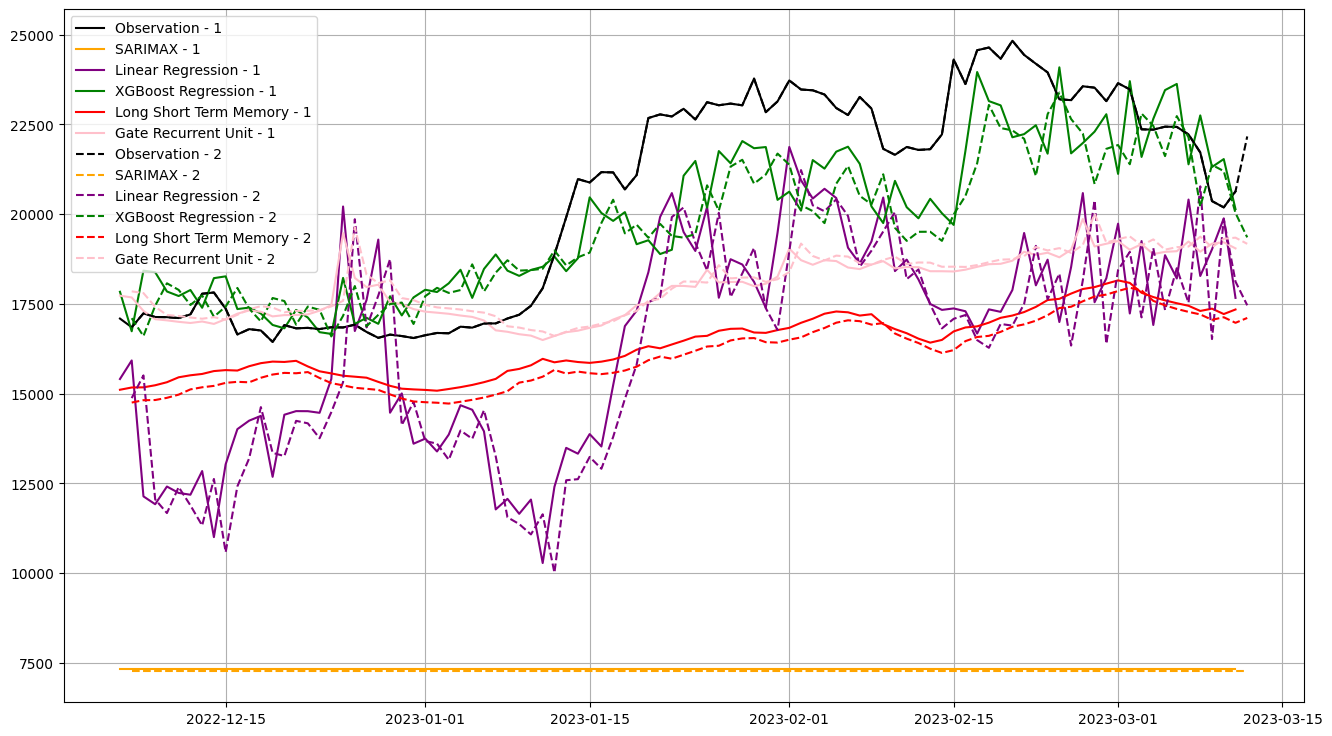

In [126]:
# plt.figure(figsize=(16, 9))
# plt.grid(True)
# plt.plot(df_0['Y_test'], 'black', label='Observation - 1')
# plt.plot(df_0['Y_SARIMAX'], 'orange', label='SARIMAX - 1')
# plt.plot(df_0["Y_LR"], 'purple', label=f'Linear Regression - 1')
# plt.plot(df_0["Y_XGBR"], 'green', label=f'XGBoost Regression - 1')
# plt.plot(df_0["Y_LSTM"], 'red', label=f'Long Short Term Memory - 1')
# plt.plot(df_0["Y_GRU"], 'pink', label=f'Gate Recurrent Unit - 1')
# plt.plot(df_1['Y_test'], 'black', label='Observation - 2', linestyle='dashed')
# plt.plot(df_1['Y_SARIMAX'], 'orange', label='SARIMAX - 2', linestyle='dashed')
# plt.plot(df_1["Y_LR"], 'purple', label=f'Linear Regression - 2', linestyle='dashed')
# plt.plot(df_1["Y_XGBR"], 'green', label=f'XGBoost Regression - 2', linestyle='dashed')
# plt.plot(df_1["Y_LSTM"], 'red', label=f'Long Short Term Memory - 2', linestyle='dashed')
# plt.plot(df_1["Y_GRU"], 'pink', label=f'Gate Recurrent Unit - 2', linestyle='dashed')
# plt.legend()
# plt.savefig(f'G:/My Drive/CNTMDT/_Final/Image/{T1}_{TF2}.png')

## Save Model

In [109]:
from tensorflow.keras.models import load_model

In [110]:
import pickle
# Other
sarimax_filename_0 =  f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_0.h5'
pickle.dump(sarimax_fit_0, open(sarimax_filename_0, 'wb'))
sarimax_filename_1 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_1.h5'
pickle.dump(sarimax_fit_1, open(sarimax_filename_1, 'wb'))
sarimax_filename_2 =  f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_2.h5'
pickle.dump(sarimax_fit_2, open(sarimax_filename_2, 'wb'))
sarimax_filename_3 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_3.h5'
pickle.dump(sarimax_fit_3, open(sarimax_filename_3, 'wb'))
sarimax_filename_4 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_4.h5'
pickle.dump(sarimax_fit_4, open(sarimax_filename_4, 'wb'))
sarimax_filename_5 =  f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_5.h5'
pickle.dump(sarimax_fit_5, open(sarimax_filename_5, 'wb'))
sarimax_filename_6 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_6.h5'
pickle.dump(sarimax_fit_6, open(sarimax_filename_6, 'wb'))
lr_filename = f'G:/My Drive/CNTMDT/_Final/Model/lr_original_{T1}_{TF2}.h5'
pickle.dump(lr_mod, open(lr_filename, 'wb'))
xgbr_filename = f'G:/My Drive/CNTMDT/_Final/Model/xgbr_original_{T1}_{TF2}.h5'
pickle.dump(xgbr_mod, open(xgbr_filename, 'wb'))
#### Keras
lstm_mod.save(f'G:/My Drive/CNTMDT/_Final/Model/lstm_original_{T1}_{TF2}.h5')
gru_mod.save(f'G:/My Drive/CNTMDT/_Final/Model/gru_original_{T1}_{TF2}.h5')

# Draft

In [111]:
from tensorflow.keras.models import load_model

In [112]:
import pickle
# Other
sarimax_filename_0 =  f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_0.h5'
sarimax_mod_0 = pickle.load(open(sarimax_filename_0, 'rb'))
sarimax_filename_1 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_1.h5'
sarimax_mod_1 = pickle.load(open(sarimax_filename_1, 'rb'))
sarimax_filename_2 =  f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_2.h5'
sarimax_mod_2 = pickle.load(open(sarimax_filename_2, 'rb'))
sarimax_filename_3 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_3.h5'
sarimax_mod_3 = pickle.load(open(sarimax_filename_3, 'rb'))
sarimax_filename_4 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_4.h5'
sarimax_mod_4 = pickle.load(open(sarimax_filename_4, 'rb'))
sarimax_filename_5 =  f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_5.h5'
sarimax_mod_5 = pickle.load(open(sarimax_filename_5, 'rb'))
sarimax_filename_6 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_6.h5'
sarimax_mod_6 = pickle.load(open(sarimax_filename_6, 'rb'))
lr_filename = f'G:/My Drive/CNTMDT/_Final/Model/lr_original_{T1}_{TF2}.h5'
lr_mod = pickle.load(open(lr_filename, 'rb'))
xgbr_filename = f'G:/My Drive/CNTMDT/_Final/Model/xgbr_original_{T1}_{TF2}.h5'
xgbr_mod = pickle.load(open(xgbr_filename, 'rb'))
#### Keras
lstm_mod = load_model(f'G:/My Drive/CNTMDT/_Final/Model/lstm_original_{T1}_{TF2}.h5')
gru_mod = load_model(f'G:/My Drive/CNTMDT/_Final/Model/gru_original_{T1}_{TF2}.h5')

In [113]:
import joblib
scaler_single_filename = "G:/My Drive/CNTMDT/_Final/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [114]:
y17_original_minmax_train_0, y17_original_minmax_train_1, y17_original_minmax_train_2, y17_original_minmax_train_3, y17_original_minmax_train_4, y17_original_minmax_train_5, y17_original_minmax_train_6 = split_y_y(y17_original_minmax_train)
y17_original_minmax_test_0, y17_original_minmax_test_1, y17_original_minmax_test_2, y17_original_minmax_test_3, y17_original_minmax_test_4, y17_original_minmax_test_5, y17_original_minmax_test_6 = split_y_y(y17_original_minmax_test)

In [115]:
sarimax_pred_0 = sarimax_mod_0.predict(start = 1, end = len(y17_original_minmax_test_0), exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_1 = sarimax_mod_1.predict(start = 1, end = len(y17_original_minmax_test_1),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_2 = sarimax_mod_2.predict(start = 1, end = len(y17_original_minmax_test_2), exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_3 = sarimax_mod_3.predict(start = 1, end = len(y17_original_minmax_test_3),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_4 = sarimax_mod_4.predict(start = 1, end = len(y17_original_minmax_test_4),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_5 = sarimax_mod_5.predict(start = 1, end = len(y17_original_minmax_test_5), exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_6 = sarimax_mod_6.predict(start = 1, end = len(y17_original_minmax_test_6),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
lr_pred = lr_mod.predict(x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
xgbr_pred = xgbr_mod.predict(x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
lstm_pred = lstm_mod.predict(x17_original_minmax_test)
gru_pred = gru_mod.predict(x17_original_minmax_test)

3/3 [==============================] - 1s 3ms/step


In [116]:
y_test_inv = []
for i in range(0, len(y17_original_minmax_test)):
    y_test_inv.append(scaler_single.inverse_transform(y17_original_minmax_test[i].reshape(-1, 1)))
y_test_inv = np.array(y_test_inv).reshape(len(y17_original_minmax_test), 7)
y_sarima_inv = []
for i in range(0, len(sarimax_pred_0)):
    y_sarima_inv.append(scaler_single.inverse_transform(np.array([sarimax_pred_0[0], sarimax_pred_1[0], sarimax_pred_2[0], sarimax_pred_3[0], sarimax_pred_4[0], sarimax_pred_5[0], sarimax_pred_6[0]]).reshape(-1, 1)))
y_sarima_inv = np.array(y_sarima_inv).reshape(len(sarimax_pred_0), 7)
y_lr_inv = []
for i in range(0, len(lr_pred)):
    y_lr_inv.append(scaler_single.inverse_transform(lr_pred[i].reshape(-1, 1)))
y_lr_inv = np.array(y_lr_inv).reshape(len(lr_pred), 7)
y_xgbr_inv = []
for i in range(0, len(xgbr_pred)):
    y_xgbr_inv.append(scaler_single.inverse_transform(xgbr_pred[i].reshape(-1, 1)))
y_xgbr_inv = np.array(y_xgbr_inv).reshape(len(xgbr_pred), 7)
y_lstm_inv = []
for i in range(0, len(lstm_pred)):
    y_lstm_inv.append(scaler_single.inverse_transform(lstm_pred[i].reshape(-1, 1)))
y_lstm_inv = np.array(y_lstm_inv).reshape(len(lstm_pred), 7)
y_gru_inv = []
for i in range(0, len(gru_pred)):
    y_gru_inv.append(scaler_single.inverse_transform(gru_pred[i].reshape(-1, 1)))
y_gru_inv = np.array(y_gru_inv).reshape(len(gru_pred), 7)

In [117]:
y_test_inv_0, y_test_inv_1, y_test_inv_2, y_test_inv_3, y_test_inv_4, y_test_inv_5, y_test_inv_6 = split_y_y(y_test_inv)
y_sarima_inv_0, y_sarima_inv_1, y_sarima_inv_2, y_sarima_inv_3, y_sarima_inv_4, y_sarima_inv_5, y_sarima_inv_6 = split_y_y(y_sarima_inv)
y_lr_inv_0, y_lr_inv_1, y_lr_inv_2, y_lr_inv_3, y_lr_inv_4, y_lr_inv_5, y_lr_inv_6 = split_y_y(y_lr_inv)
y_xgbr_inv_0, y_xgbr_inv_1, y_xgbr_inv_2, y_xgbr_inv_3, y_xgbr_inv_4, y_xgbr_inv_5, y_xgbr_inv_6 = split_y_y(y_xgbr_inv)
y_lstm_inv_0, y_lstm_inv_1, y_lstm_inv_2, y_lstm_inv_3, y_lstm_inv_4, y_lstm_inv_5, y_lstm_inv_6 = split_y_y(y_lstm_inv)
y_gru_inv_0, y_gru_inv_1, y_gru_inv_2, y_gru_inv_3, y_gru_inv_4, y_gru_inv_5, y_gru_inv_6 = split_y_y(y_gru_inv)

In [118]:
date_index = np.array(df_normalize.index)
print(type(date_index))
date_index = date_index.reshape(-1, 1)
date_index


<class 'numpy.ndarray'>


array([['2020-03-12T00:00:00.000000000'],
       ['2020-03-13T00:00:00.000000000'],
       ['2020-03-14T00:00:00.000000000'],
       ...,
       ['2023-03-10T00:00:00.000000000'],
       ['2023-03-11T00:00:00.000000000'],
       ['2023-03-12T00:00:00.000000000']], dtype='datetime64[ns]')

In [119]:
date_array = []
for t in range(len(date_index) - T1 - TF2 + 1):
    date_value = date_index[t + T1 : t + T1 + TF2, :]
    date_array.append(date_value)
date_array = np.array(date_array).reshape(len(date_array), TF2)
print("date.shape", date_array.shape) 


date.shape (1076, 7)


In [120]:
date_test = date_array[-NTest:]
date_test

array([['2022-12-01T00:00:00.000000000', '2022-12-02T00:00:00.000000000',
        '2022-12-03T00:00:00.000000000', '2022-12-04T00:00:00.000000000',
        '2022-12-05T00:00:00.000000000', '2022-12-06T00:00:00.000000000',
        '2022-12-07T00:00:00.000000000'],
       ['2022-12-02T00:00:00.000000000', '2022-12-03T00:00:00.000000000',
        '2022-12-04T00:00:00.000000000', '2022-12-05T00:00:00.000000000',
        '2022-12-06T00:00:00.000000000', '2022-12-07T00:00:00.000000000',
        '2022-12-08T00:00:00.000000000'],
       ['2022-12-03T00:00:00.000000000', '2022-12-04T00:00:00.000000000',
        '2022-12-05T00:00:00.000000000', '2022-12-06T00:00:00.000000000',
        '2022-12-07T00:00:00.000000000', '2022-12-08T00:00:00.000000000',
        '2022-12-09T00:00:00.000000000'],
       ['2022-12-04T00:00:00.000000000', '2022-12-05T00:00:00.000000000',
        '2022-12-06T00:00:00.000000000', '2022-12-07T00:00:00.000000000',
        '2022-12-08T00:00:00.000000000', '2022-12-09T00:00:0

In [121]:
date_test_0, date_test_1, date_test_2, date_test_3, date_test_4, date_test_5, date_test_6 = split_y_y(date_test)
print(date_test_0.shape, date_test_1.shape, date_test_2.shape, date_test_3.shape, date_test_4.shape, date_test_5.shape, date_test_6.shape)

(96,) (96,) (96,) (96,) (96,) (96,) (96,)


In [122]:
detail_sarima_0 = {
    "Date" : date_test_0,
    "Y_test": y_test_inv_0,
    "Y_SARIMAX": y_sarima_inv_0
}
df_sarima_0 = pd.DataFrame(detail_sarima_0, columns = ["Date", "Y_test","Y_SARIMAX"])
# df_sarima_0.set_index("Date", inplace = True)
# df_sarima_0.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_2_days_1/{T1}_days_{TF2}_day_SARIMAX.csv")

In [123]:
detail_sarima_1 = {
    "Date" : date_test_1,
    "Y_test": y_test_inv_1,
    "Y_SARIMAX": y_sarima_inv_1
}
df_sarima_1 = pd.DataFrame(detail_sarima_1, columns = ["Date", "Y_test","Y_SARIMAX"])
# df_sarima_1.set_index("Date", inplace = True)
# df_sarima_1.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_2_days_2/{T1}_days_{TF2}_day_SARIMAX.csv")

In [124]:
detail_sarima_2 = {
    "Date" : date_test_2,
    "Y_test": y_test_inv_2,
    "Y_SARIMAX": y_sarima_inv_2
}
df_sarima_2 = pd.DataFrame(detail_sarima_2, columns = ["Date", "Y_test","Y_SARIMAX"])
# df_sarima_2.set_index("Date", inplace = True)
# df_sarima_2.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_2_days_1/{T1}_days_{TF2}_day_SARIMAX.csv")

In [125]:
detail_sarima_3 = {
    "Date" : date_test_3,
    "Y_test": y_test_inv_3,
    "Y_SARIMAX": y_sarima_inv_3
}
df_sarima_3 = pd.DataFrame(detail_sarima_3, columns = ["Date", "Y_test","Y_SARIMAX"])
# df_sarima_3.set_index("Date", inplace = True)
# df_sarima_3.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_3_days_1/{T1}_days_{TF2}_day_SARIMAX.csv")

In [126]:
detail_sarima_4 = {
    "Date" : date_test_4,
    "Y_test": y_test_inv_4,
    "Y_SARIMAX": y_sarima_inv_4
}
df_sarima_4 = pd.DataFrame(detail_sarima_4, columns = ["Date", "Y_test","Y_SARIMAX"])
# df_sarima_4.set_index("Date", inplace = True)
# df_sarima_4.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_4_days_1/{T1}_days_{TF2}_day_SARIMAX.csv")

In [127]:
detail_sarima_5 = {
    "Date" : date_test_5,
    "Y_test": y_test_inv_5,
    "Y_SARIMAX": y_sarima_inv_5
}
df_sarima_5 = pd.DataFrame(detail_sarima_5, columns = ["Date", "Y_test","Y_SARIMAX"])
# df_sarima_5.set_index("Date", inplace = True)
# df_sarima_5.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_5_days_1/{T1}_days_{TF2}_day_SARIMAX.csv")

In [128]:
detail_sarima_6 = {
    "Date" : date_test_6,
    "Y_test": y_test_inv_6,
    "Y_SARIMAX": y_sarima_inv_6
}
df_sarima_6 = pd.DataFrame(detail_sarima_6, columns = ["Date", "Y_test","Y_SARIMAX"])
# df_sarima_6.set_index("Date", inplace = True)
# df_sarima_6.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_6_days_1/{T1}_days_{TF2}_day_SARIMAX.csv")

In [153]:
df_sarimax = pd.merge(df_sarima_0[['Date', 'Y_test', 'Y_SARIMAX']], df_sarima_1[['Date', 'Y_SARIMAX']], on = "Date", how = "outer")
df_sarimax.rename(columns = {'Y_SARIMAX_x':'Furture - 1', 'Y_SARIMAX_y':'Furture - 2'}, inplace = True)
df_sarimax = pd.merge(df_sarimax[['Date', 'Y_test', 'Furture - 1', 'Furture - 2']], df_sarima_2[['Date', 'Y_SARIMAX']], on = "Date", how = "outer")
df_sarimax.rename(columns = {'Y_SARIMAX':'Furture - 3',}, inplace = True)
df_sarimax = pd.merge(df_sarimax[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3']], df_sarima_3[['Date', 'Y_SARIMAX']], on = "Date", how = "outer")
df_sarimax.rename(columns = {'Y_SARIMAX':'Furture - 4',}, inplace = True)
df_sarimax = pd.merge(df_sarimax[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4']], df_sarima_4[['Date','Y_SARIMAX']], on = "Date", how = "outer")
df_sarimax.rename(columns = {'Y_SARIMAX':'Furture - 5',}, inplace = True)
df_sarimax = pd.merge(df_sarimax[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4', 'Furture - 5']], df_sarima_5[['Date', 'Y_SARIMAX']], on = "Date", how = "outer")
df_sarimax.rename(columns = {'Y_SARIMAX':'Furture - 6',}, inplace = True)
df_sarimax = pd.merge(df_sarimax[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4', 'Furture - 5', 'Furture - 6']], df_sarima_6[['Date', 'Y_SARIMAX']], on = "Date", how = "outer")
df_sarimax.rename(columns = {'Y_SARIMAX':'Furture - 7',}, inplace = True)
df_sarimax.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_7_days/{T1}_days_{TF2}_day_SARIMAX.csv")
df_sarimax.head(5)

,Date,Y_test,Furture - 1,Furture - 2,Furture - 3,Furture - 4,Furture - 5,Furture - 6,Furture - 7
0,2022-12-01,16967.132812,7118.602888,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,17088.660156,7118.602888,7559.905083,NaN,NaN,NaN,NaN,NaN
2,2022-12-03,16908.236328,7118.602888,7559.905083,5892.53379,NaN,NaN,NaN,NaN
3,2022-12-04,17130.486328,7118.602888,7559.905083,5892.53379,6040.674377,NaN,NaN,NaN
4,2022-12-05,16974.826172,7118.602888,7559.905083,5892.53379,6040.674377,7763.056115,NaN,NaN


In [151]:
detail_LR_0 = {
    "Date" : date_test_0,
    "Y_test": y_test_inv_0,
    "Y_LR": y_lr_inv_0
}
df_LR_0 = pd.DataFrame(detail_LR_0, columns = ["Date", "Y_test","Y_LR"])
detail_LR_1 = {
    "Date" : date_test_1,
    "Y_test": y_test_inv_1,
    "Y_LR": y_lr_inv_1
}
df_LR_1 = pd.DataFrame(detail_LR_1, columns = ["Date", "Y_test","Y_LR"])
detail_LR_2 = {
    "Date" : date_test_2,
    "Y_test": y_test_inv_2,
    "Y_LR": y_lr_inv_2
}
df_LR_2 = pd.DataFrame(detail_LR_2, columns = ["Date", "Y_test","Y_LR"])
detail_LR_3 = {
    "Date" : date_test_3,
    "Y_test": y_test_inv_3,
    "Y_LR": y_lr_inv_3
}
df_LR_3 = pd.DataFrame(detail_LR_3, columns = ["Date", "Y_test","Y_LR"])
detail_LR_4 = {
    "Date" : date_test_4,
    "Y_test": y_test_inv_4,
    "Y_LR": y_lr_inv_4
}
df_LR_4 = pd.DataFrame(detail_LR_4, columns = ["Date", "Y_test","Y_LR"])
detail_LR_5 = {
    "Date" : date_test_5,
    "Y_test": y_test_inv_5,
    "Y_LR": y_lr_inv_5
}
df_LR_5 = pd.DataFrame(detail_LR_5, columns = ["Date", "Y_test","Y_LR"])
detail_LR_6 = {
    "Date" : date_test_6,
    "Y_test": y_test_inv_6,
    "Y_LR": y_lr_inv_6
}
df_LR_6 = pd.DataFrame(detail_LR_6, columns = ["Date", "Y_test","Y_LR"])

In [154]:
df_LR = pd.merge(df_LR_0[['Date', 'Y_test', 'Y_LR']], df_LR_1[['Date', 'Y_LR']], on = "Date", how = "outer")
df_LR.rename(columns = {'Y_LR_x':'Furture - 1', 'Y_LR_y':'Furture - 2'}, inplace = True)
df_LR = pd.merge(df_LR[['Date', 'Y_test', 'Furture - 1', 'Furture - 2']], df_LR_2[['Date', 'Y_LR']], on = "Date", how = "outer")
df_LR.rename(columns = {'Y_LR':'Furture - 3',}, inplace = True)
df_LR = pd.merge(df_LR[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3']], df_LR_3[['Date', 'Y_LR']], on = "Date", how = "outer")
df_LR.rename(columns = {'Y_LR':'Furture - 4',}, inplace = True)
df_LR = pd.merge(df_LR[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4']], df_LR_4[['Date','Y_LR']], on = "Date", how = "outer")
df_LR.rename(columns = {'Y_LR':'Furture - 5',}, inplace = True)
df_LR = pd.merge(df_LR[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4', 'Furture - 5']], df_LR_5[['Date', 'Y_LR']], on = "Date", how = "outer")
df_LR.rename(columns = {'Y_LR':'Furture - 6',}, inplace = True)
df_LR = pd.merge(df_LR[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4', 'Furture - 5', 'Furture - 6']], df_LR_6[['Date', 'Y_LR']], on = "Date", how = "outer")
df_LR.rename(columns = {'Y_LR':'Furture - 7',}, inplace = True)
df_LR.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_7_days/{T1}_days_{TF2}_day_LR.csv")
df_LR.head(5)

,Date,Y_test,Furture - 1,Furture - 2,Furture - 3,Furture - 4,Furture - 5,Furture - 6,Furture - 7
0,2022-12-01,16967.132812,15513.112798,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,17088.660156,14647.224252,15212.591464,NaN,NaN,NaN,NaN,NaN
2,2022-12-03,16908.236328,16348.795201,14356.809171,14931.534635,NaN,NaN,NaN,NaN
3,2022-12-04,17130.486328,16739.232364,16558.203107,14581.285794,15312.167595,NaN,NaN,NaN
4,2022-12-05,16974.826172,16037.662241,16409.163702,16210.299362,14320.065710,14962.522245,NaN,NaN


In [157]:
detail_XGBR_0 = {
    "Date" : date_test_0,
    "Y_test": y_test_inv_0,
    "Y_XGBR": y_xgbr_inv_0
}
df_XGBR_0 = pd.DataFrame(detail_XGBR_0, columns = ["Date", "Y_test","Y_XGBR"])
detail_XGBR_1 = {
    "Date" : date_test_1,
    "Y_test": y_test_inv_1,
    "Y_XGBR": y_xgbr_inv_1
}
df_XGBR_1 = pd.DataFrame(detail_XGBR_1, columns = ["Date", "Y_test","Y_XGBR"])
detail_XGBR_2 = {
    "Date" : date_test_2,
    "Y_test": y_test_inv_2,
    "Y_XGBR": y_xgbr_inv_2
}
df_XGBR_2 = pd.DataFrame(detail_XGBR_2, columns = ["Date", "Y_test","Y_XGBR"])
detail_XGBR_3 = {
    "Date" : date_test_3,
    "Y_test": y_test_inv_3,
    "Y_XGBR": y_xgbr_inv_3
}
df_XGBR_3 = pd.DataFrame(detail_XGBR_3, columns = ["Date", "Y_test","Y_XGBR"])
detail_XGBR_4 = {
    "Date" : date_test_4,
    "Y_test": y_test_inv_4,
    "Y_XGBR": y_xgbr_inv_4
}
df_XGBR_4 = pd.DataFrame(detail_XGBR_4, columns = ["Date", "Y_test","Y_XGBR"])
detail_XGBR_5 = {
    "Date" : date_test_5,
    "Y_test": y_test_inv_5,
    "Y_XGBR": y_xgbr_inv_5
}
df_XGBR_5 = pd.DataFrame(detail_XGBR_5, columns = ["Date", "Y_test","Y_XGBR"])
detail_XGBR_6 = {
    "Date" : date_test_6,
    "Y_test": y_test_inv_6,
    "Y_XGBR": y_xgbr_inv_6
}
df_XGBR_6 = pd.DataFrame(detail_XGBR_6, columns = ["Date", "Y_test","Y_XGBR"])

In [158]:
df_XGBR = pd.merge(df_XGBR_0[['Date', 'Y_test', 'Y_XGBR']], df_XGBR_1[['Date', 'Y_XGBR']], on = "Date", how = "outer")
df_XGBR.rename(columns = {'Y_XGBR_x':'Furture - 1', 'Y_XGBR_y':'Furture - 2'}, inplace = True)
df_XGBR = pd.merge(df_XGBR[['Date', 'Y_test', 'Furture - 1', 'Furture - 2']], df_XGBR_2[['Date', 'Y_XGBR']], on = "Date", how = "outer")
df_XGBR.rename(columns = {'Y_XGBR':'Furture - 3',}, inplace = True)
df_XGBR = pd.merge(df_XGBR[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3']], df_XGBR_3[['Date', 'Y_XGBR']], on = "Date", how = "outer")
df_XGBR.rename(columns = {'Y_XGBR':'Furture - 4',}, inplace = True)
df_XGBR = pd.merge(df_XGBR[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4']], df_XGBR_4[['Date','Y_XGBR']], on = "Date", how = "outer")
df_XGBR.rename(columns = {'Y_XGBR':'Furture - 5',}, inplace = True)
df_XGBR = pd.merge(df_XGBR[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4', 'Furture - 5']], df_XGBR_5[['Date', 'Y_XGBR']], on = "Date", how = "outer")
df_XGBR.rename(columns = {'Y_XGBR':'Furture - 6',}, inplace = True)
df_XGBR = pd.merge(df_XGBR[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4', 'Furture - 5', 'Furture - 6']], df_XGBR_6[['Date', 'Y_XGBR']], on = "Date", how = "outer")
df_XGBR.rename(columns = {'Y_XGBR':'Furture - 7',}, inplace = True)
df_XGBR.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_7_days/{T1}_days_{TF2}_day_XGBR.csv")
df_XGBR.head(5)

,Date,Y_test,Furture - 1,Furture - 2,Furture - 3,Furture - 4,Furture - 5,Furture - 6,Furture - 7
0,2022-12-01,16967.132812,17019.019531,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,17088.660156,17345.986328,16819.863281,NaN,NaN,NaN,NaN,NaN
2,2022-12-03,16908.236328,17009.115234,17161.091797,16962.580078,NaN,NaN,NaN,NaN
3,2022-12-04,17130.486328,16884.177734,16967.648438,17254.029297,17151.851562,NaN,NaN,NaN
4,2022-12-05,16974.826172,17359.408203,16585.042969,16925.759766,17090.699219,17215.294922,NaN,NaN


In [159]:
detail_LSTM_0 = {
    "Date" : date_test_0,
    "Y_test": y_test_inv_0,
    "Y_LSTM": y_lstm_inv_0
}
df_LSTM_0 = pd.DataFrame(detail_LSTM_0, columns = ["Date", "Y_test","Y_LSTM"])
detail_LSTM_1 = {
    "Date" : date_test_1,
    "Y_test": y_test_inv_1,
    "Y_LSTM": y_lstm_inv_1
}
df_LSTM_1 = pd.DataFrame(detail_LSTM_1, columns = ["Date", "Y_test","Y_LSTM"])
detail_LSTM_2 = {
    "Date" : date_test_2,
    "Y_test": y_test_inv_2,
    "Y_LSTM": y_lstm_inv_2
}
df_LSTM_2 = pd.DataFrame(detail_LSTM_2, columns = ["Date", "Y_test","Y_LSTM"])
detail_LSTM_3 = {
    "Date" : date_test_3,
    "Y_test": y_test_inv_3,
    "Y_LSTM": y_lstm_inv_3
}
df_LSTM_3 = pd.DataFrame(detail_LSTM_3, columns = ["Date", "Y_test","Y_LSTM"])
detail_LSTM_4 = {
    "Date" : date_test_4,
    "Y_test": y_test_inv_4,
    "Y_LSTM": y_lstm_inv_4
}
df_LSTM_4 = pd.DataFrame(detail_LSTM_4, columns = ["Date", "Y_test","Y_LSTM"])
detail_LSTM_5 = {
    "Date" : date_test_5,
    "Y_test": y_test_inv_5,
    "Y_LSTM": y_lstm_inv_5
}
df_LSTM_5 = pd.DataFrame(detail_LSTM_5, columns = ["Date", "Y_test","Y_LSTM"])
detail_LSTM_6 = {
    "Date" : date_test_6,
    "Y_test": y_test_inv_6,
    "Y_LSTM": y_lstm_inv_6
}
df_LSTM_6 = pd.DataFrame(detail_LSTM_6, columns = ["Date", "Y_test","Y_LSTM"])

In [160]:
df_LSTM = pd.merge(df_LSTM_0[['Date', 'Y_test', 'Y_LSTM']], df_LSTM_1[['Date', 'Y_LSTM']], on = "Date", how = "outer")
df_LSTM.rename(columns = {'Y_LSTM_x':'Furture - 1', 'Y_LSTM_y':'Furture - 2'}, inplace = True)
df_LSTM = pd.merge(df_LSTM[['Date', 'Y_test', 'Furture - 1', 'Furture - 2']], df_LSTM_2[['Date', 'Y_LSTM']], on = "Date", how = "outer")
df_LSTM.rename(columns = {'Y_LSTM':'Furture - 3',}, inplace = True)
df_LSTM = pd.merge(df_LSTM[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3']], df_LSTM_3[['Date', 'Y_LSTM']], on = "Date", how = "outer")
df_LSTM.rename(columns = {'Y_LSTM':'Furture - 4',}, inplace = True)
df_LSTM = pd.merge(df_LSTM[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4']], df_LSTM_4[['Date','Y_LSTM']], on = "Date", how = "outer")
df_LSTM.rename(columns = {'Y_LSTM':'Furture - 5',}, inplace = True)
df_LSTM = pd.merge(df_LSTM[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4', 'Furture - 5']], df_LSTM_5[['Date', 'Y_LSTM']], on = "Date", how = "outer")
df_LSTM.rename(columns = {'Y_LSTM':'Furture - 6',}, inplace = True)
df_LSTM = pd.merge(df_LSTM[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4', 'Furture - 5', 'Furture - 6']], df_LSTM_6[['Date', 'Y_LSTM']], on = "Date", how = "outer")
df_LSTM.rename(columns = {'Y_LSTM':'Furture - 7',}, inplace = True)
df_LSTM.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_7_days/{T1}_days_{TF2}_day_LSTM.csv")
df_LSTM.head(5)

,Date,Y_test,Furture - 1,Furture - 2,Furture - 3,Furture - 4,Furture - 5,Furture - 6,Furture - 7
0,2022-12-01,16967.132812,28733.458984,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,17088.660156,28656.896484,29169.400391,NaN,NaN,NaN,NaN,NaN
2,2022-12-03,16908.236328,28549.988281,29089.519531,28922.568359,NaN,NaN,NaN,NaN
3,2022-12-04,17130.486328,28411.441406,28980.917969,28849.164062,29601.240234,NaN,NaN,NaN
4,2022-12-05,16974.826172,28252.423828,28841.287109,28750.171875,29519.529297,29462.072266,NaN,NaN


In [161]:
detail_GRU_0 = {
    "Date" : date_test_0,
    "Y_test": y_test_inv_0,
    "Y_GRU": y_gru_inv_0
}
df_GRU_0 = pd.DataFrame(detail_GRU_0, columns = ["Date", "Y_test","Y_GRU"])
detail_GRU_1 = {
    "Date" : date_test_1,
    "Y_test": y_test_inv_1,
    "Y_GRU": y_gru_inv_1
}
df_GRU_1 = pd.DataFrame(detail_GRU_1, columns = ["Date", "Y_test","Y_GRU"])
detail_GRU_2 = {
    "Date" : date_test_2,
    "Y_test": y_test_inv_2,
    "Y_GRU": y_gru_inv_2
}
df_GRU_2 = pd.DataFrame(detail_GRU_2, columns = ["Date", "Y_test","Y_GRU"])
detail_GRU_3 = {
    "Date" : date_test_3,
    "Y_test": y_test_inv_3,
    "Y_GRU": y_gru_inv_3
}
df_GRU_3 = pd.DataFrame(detail_GRU_3, columns = ["Date", "Y_test","Y_GRU"])
detail_GRU_4 = {
    "Date" : date_test_4,
    "Y_test": y_test_inv_4,
    "Y_GRU": y_gru_inv_4
}
df_GRU_4 = pd.DataFrame(detail_GRU_4, columns = ["Date", "Y_test","Y_GRU"])
detail_GRU_5 = {
    "Date" : date_test_5,
    "Y_test": y_test_inv_5,
    "Y_GRU": y_gru_inv_5
}
df_GRU_5 = pd.DataFrame(detail_GRU_5, columns = ["Date", "Y_test","Y_GRU"])
detail_GRU_6 = {
    "Date" : date_test_6,
    "Y_test": y_test_inv_6,
    "Y_GRU": y_gru_inv_6
}
df_GRU_6 = pd.DataFrame(detail_GRU_6, columns = ["Date", "Y_test","Y_GRU"])

In [162]:
df_GRU = pd.merge(df_GRU_0[['Date', 'Y_test', 'Y_GRU']], df_GRU_1[['Date', 'Y_GRU']], on = "Date", how = "outer")
df_GRU.rename(columns = {'Y_GRU_x':'Furture - 1', 'Y_GRU_y':'Furture - 2'}, inplace = True)
df_GRU = pd.merge(df_GRU[['Date', 'Y_test', 'Furture - 1', 'Furture - 2']], df_GRU_2[['Date', 'Y_GRU']], on = "Date", how = "outer")
df_GRU.rename(columns = {'Y_GRU':'Furture - 3',}, inplace = True)
df_GRU = pd.merge(df_GRU[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3']], df_GRU_3[['Date', 'Y_GRU']], on = "Date", how = "outer")
df_GRU.rename(columns = {'Y_GRU':'Furture - 4',}, inplace = True)
df_GRU = pd.merge(df_GRU[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4']], df_GRU_4[['Date','Y_GRU']], on = "Date", how = "outer")
df_GRU.rename(columns = {'Y_GRU':'Furture - 5',}, inplace = True)
df_GRU = pd.merge(df_GRU[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4', 'Furture - 5']], df_GRU_5[['Date', 'Y_GRU']], on = "Date", how = "outer")
df_GRU.rename(columns = {'Y_GRU':'Furture - 6',}, inplace = True)
df_GRU = pd.merge(df_GRU[['Date', 'Y_test', 'Furture - 1', 'Furture - 2', 'Furture - 3', 'Furture - 4', 'Furture - 5', 'Furture - 6']], df_GRU_6[['Date', 'Y_GRU']], on = "Date", how = "outer")
df_GRU.rename(columns = {'Y_GRU':'Furture - 7',}, inplace = True)
df_GRU.to_csv(f"G:/My Drive/CNTMDT/_Final/VisualizeCuaTruc/predict_7_days/{T1}_days_{TF2}_day_GRU.csv")
df_GRU.head(5)

,Date,Y_test,Furture - 1,Furture - 2,Furture - 3,Furture - 4,Furture - 5,Furture - 6,Furture - 7
0,2022-12-01,16967.132812,14985.542969,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,17088.660156,14835.274414,15038.901367,NaN,NaN,NaN,NaN,NaN
2,2022-12-03,16908.236328,14864.087891,14853.255859,15515.976562,NaN,NaN,NaN,NaN
3,2022-12-04,17130.486328,14903.860352,14921.843750,15376.635742,15572.114258,NaN,NaN,NaN
4,2022-12-05,16974.826172,14859.927734,15008.975586,15415.513672,15406.225586,15063.053711,NaN,NaN


# Draft

In [163]:
from tensorflow.keras.models import load_model

In [164]:
import pickle
# Other
sarimax_filename_0 =  f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_0.h5'
sarimax_mod_0 = pickle.load(open(sarimax_filename_0, 'rb'))
sarimax_filename_1 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_1.h5'
sarimax_mod_1 = pickle.load(open(sarimax_filename_1, 'rb'))
sarimax_filename_2 =  f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_2.h5'
sarimax_mod_2 = pickle.load(open(sarimax_filename_2, 'rb'))
sarimax_filename_3 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_3.h5'
sarimax_mod_3 = pickle.load(open(sarimax_filename_3, 'rb'))
sarimax_filename_4 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_4.h5'
sarimax_mod_4 = pickle.load(open(sarimax_filename_4, 'rb'))
sarimax_filename_5 =  f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_5.h5'
sarimax_mod_5 = pickle.load(open(sarimax_filename_5, 'rb'))
sarimax_filename_6 = f'G:/My Drive/CNTMDT/_Final/Model/sarimax_original_{T1}_{TF2}_6.h5'
sarimax_mod_6 = pickle.load(open(sarimax_filename_6, 'rb'))
lr_filename = f'G:/My Drive/CNTMDT/_Final/Model/lr_original_{T1}_{TF2}.h5'
lr_mod = pickle.load(open(lr_filename, 'rb'))
xgbr_filename = f'G:/My Drive/CNTMDT/_Final/Model/xgbr_original_{T1}_{TF2}.h5'
xgbr_mod = pickle.load(open(xgbr_filename, 'rb'))
#### Keras
lstm_mod = load_model(f'G:/My Drive/CNTMDT/_Final/Model/lstm_original_{T1}_{TF2}.h5')
gru_mod = load_model(f'G:/My Drive/CNTMDT/_Final/Model/gru_original_{T1}_{TF2}.h5')

In [165]:
import joblib
scaler_single_filename = "G:/My Drive/CNTMDT/_Final/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [166]:
y17_original_minmax_train_0, y17_original_minmax_train_1, y17_original_minmax_train_2, y17_original_minmax_train_3, y17_original_minmax_train_4, y17_original_minmax_train_5, y17_original_minmax_train_6 = split_y_y(y17_original_minmax_train)
y17_original_minmax_test_0, y17_original_minmax_test_1, y17_original_minmax_test_2, y17_original_minmax_test_3, y17_original_minmax_test_4, y17_original_minmax_test_5, y17_original_minmax_test_6 = split_y_y(y17_original_minmax_test)

In [167]:
sarimax_pred_0 = sarimax_mod_0.predict(start = 1, end = len(y17_original_minmax_test_0), exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_1 = sarimax_mod_1.predict(start = 1, end = len(y17_original_minmax_test_1),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_2 = sarimax_mod_2.predict(start = 1, end = len(y17_original_minmax_test_2), exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_3 = sarimax_mod_3.predict(start = 1, end = len(y17_original_minmax_test_3),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_4 = sarimax_mod_4.predict(start = 1, end = len(y17_original_minmax_test_4),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_5 = sarimax_mod_5.predict(start = 1, end = len(y17_original_minmax_test_5), exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
sarimax_pred_6 = sarimax_mod_6.predict(start = 1, end = len(y17_original_minmax_test_6),exog = x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
lr_pred = lr_mod.predict(x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
xgbr_pred = xgbr_mod.predict(x17_original_minmax_test.reshape(len(x17_original_minmax_test),NFeature*T1))
lstm_pred = lstm_mod.predict(x17_original_minmax_test)
gru_pred = gru_mod.predict(x17_original_minmax_test)

3/3 [==============================] - 1s 4ms/step


In [168]:
y_test_inv = []
for i in range(0, len(y17_original_minmax_test)):
    y_test_inv.append(scaler_single.inverse_transform(y17_original_minmax_test[i].reshape(-1, 1)))
y_test_inv = np.array(y_test_inv).reshape(len(y17_original_minmax_test), 7)
y_sarima_inv = []
for i in range(0, len(sarimax_pred_0)):
    y_sarima_inv.append(scaler_single.inverse_transform(np.array([sarimax_pred_0[0], sarimax_pred_1[0], sarimax_pred_2[0], sarimax_pred_3[0], sarimax_pred_4[0], sarimax_pred_5[0], sarimax_pred_6[0]]).reshape(-1, 1)))
y_sarima_inv = np.array(y_sarima_inv).reshape(len(sarimax_pred_0), 7)
y_lr_inv = []
for i in range(0, len(lr_pred)):
    y_lr_inv.append(scaler_single.inverse_transform(lr_pred[i].reshape(-1, 1)))
y_lr_inv = np.array(y_lr_inv).reshape(len(lr_pred), 7)
y_xgbr_inv = []
for i in range(0, len(xgbr_pred)):
    y_xgbr_inv.append(scaler_single.inverse_transform(xgbr_pred[i].reshape(-1, 1)))
y_xgbr_inv = np.array(y_xgbr_inv).reshape(len(xgbr_pred), 7)
y_lstm_inv = []
for i in range(0, len(lstm_pred)):
    y_lstm_inv.append(scaler_single.inverse_transform(lstm_pred[i].reshape(-1, 1)))
y_lstm_inv = np.array(y_lstm_inv).reshape(len(lstm_pred), 7)
y_gru_inv = []
for i in range(0, len(gru_pred)):
    y_gru_inv.append(scaler_single.inverse_transform(gru_pred[i].reshape(-1, 1)))
y_gru_inv = np.array(y_gru_inv).reshape(len(gru_pred), 7)

In [169]:
y_test_inv_0, y_test_inv_1, y_test_inv_2, y_test_inv_3, y_test_inv_4, y_test_inv_5, y_test_inv_6 = split_y_y(y_test_inv)
y_sarima_inv_0, y_sarima_inv_1, y_sarima_inv_2, y_sarima_inv_3, y_sarima_inv_4, y_sarima_inv_5, y_sarima_inv_6 = split_y_y(y_sarima_inv)
y_lr_inv_0, y_lr_inv_1, y_lr_inv_2, y_lr_inv_3, y_lr_inv_4, y_lr_inv_5, y_lr_inv_6 = split_y_y(y_lr_inv)
y_xgbr_inv_0, y_xgbr_inv_1, y_xgbr_inv_2, y_xgbr_inv_3, y_xgbr_inv_4, y_xgbr_inv_5, y_xgbr_inv_6 = split_y_y(y_xgbr_inv)
y_lstm_inv_0, y_lstm_inv_1, y_lstm_inv_2, y_lstm_inv_3, y_lstm_inv_4, y_lstm_inv_5, y_lstm_inv_6 = split_y_y(y_lstm_inv)
y_gru_inv_0, y_gru_inv_1, y_gru_inv_2, y_gru_inv_3, y_gru_inv_4, y_gru_inv_5, y_gru_inv_6 = split_y_y(y_gru_inv)

In [170]:
date_index = np.array(df_normalize.index)
print(type(date_index))
date_index = date_index.reshape(-1, 1)
date_index


<class 'numpy.ndarray'>


array([['2020-03-12T00:00:00.000000000'],
       ['2020-03-13T00:00:00.000000000'],
       ['2020-03-14T00:00:00.000000000'],
       ...,
       ['2023-03-10T00:00:00.000000000'],
       ['2023-03-11T00:00:00.000000000'],
       ['2023-03-12T00:00:00.000000000']], dtype='datetime64[ns]')

In [171]:
date_array = []
for t in range(len(date_index) - T1 - TF2 + 1):
    date_value = date_index[t + T1 : t + T1 + TF2, :]
    date_array.append(date_value)
date_array = np.array(date_array).reshape(len(date_array), TF2)
print("date.shape", date_array.shape) 


date.shape (1076, 7)


In [172]:
date_test = date_array[-NTest:]
date_test

array([['2022-12-01T00:00:00.000000000', '2022-12-02T00:00:00.000000000',
        '2022-12-03T00:00:00.000000000', '2022-12-04T00:00:00.000000000',
        '2022-12-05T00:00:00.000000000', '2022-12-06T00:00:00.000000000',
        '2022-12-07T00:00:00.000000000'],
       ['2022-12-02T00:00:00.000000000', '2022-12-03T00:00:00.000000000',
        '2022-12-04T00:00:00.000000000', '2022-12-05T00:00:00.000000000',
        '2022-12-06T00:00:00.000000000', '2022-12-07T00:00:00.000000000',
        '2022-12-08T00:00:00.000000000'],
       ['2022-12-03T00:00:00.000000000', '2022-12-04T00:00:00.000000000',
        '2022-12-05T00:00:00.000000000', '2022-12-06T00:00:00.000000000',
        '2022-12-07T00:00:00.000000000', '2022-12-08T00:00:00.000000000',
        '2022-12-09T00:00:00.000000000'],
       ['2022-12-04T00:00:00.000000000', '2022-12-05T00:00:00.000000000',
        '2022-12-06T00:00:00.000000000', '2022-12-07T00:00:00.000000000',
        '2022-12-08T00:00:00.000000000', '2022-12-09T00:00:0

In [173]:
date_test_0, date_test_1, date_test_2, date_test_3, date_test_4, date_test_5, date_test_6 = split_y_y(date_test)
print(date_test_0.shape, date_test_1.shape, date_test_2.shape, date_test_3.shape, date_test_4.shape, date_test_5.shape, date_test_6.shape)

(96,) (96,) (96,) (96,) (96,) (96,) (96,)


In [177]:
new_date = date_test_0.copy()
new_date = np.append(new_date, date_test_1[-1])
new_date = np.append(new_date, date_test_2[-1])
new_date = np.append(new_date, date_test_3[-1])
new_date = np.append(new_date, date_test_4[-1])
new_date = np.append(new_date, date_test_5[-1])
new_date = np.append(new_date, date_test_6[-1])
new_date.shape

(102,)

In [178]:
new_y_test = y_test_inv_0.copy()
new_y_test = np.append(new_y_test, y_test_inv_1[-1])
new_y_test = np.append(new_y_test, y_test_inv_2[-1])
new_y_test = np.append(new_y_test, y_test_inv_3[-1])
new_y_test = np.append(new_y_test, y_test_inv_4[-1])
new_y_test = np.append(new_y_test, y_test_inv_5[-1])
new_y_test = np.append(new_y_test, y_test_inv_6[-1])
new_y_test.shape

(102,)

In [179]:
new_y_sarima = y_sarima_inv_0.copy()
new_y_sarima = np.append(new_y_sarima, y_sarima_inv_1[-1])
new_y_sarima = np.append(new_y_sarima, y_sarima_inv_2[-1])
new_y_sarima = np.append(new_y_sarima, y_sarima_inv_3[-1])
new_y_sarima = np.append(new_y_sarima, y_sarima_inv_4[-1])
new_y_sarima = np.append(new_y_sarima, y_sarima_inv_5[-1])
new_y_sarima = np.append(new_y_sarima, y_sarima_inv_6[-1])
new_y_sarima.shape

(102,)

In [180]:
new_y_lr = y_lr_inv_0.copy()
new_y_lr = np.append(new_y_lr, y_lr_inv_1[-1])
new_y_lr = np.append(new_y_lr, y_lr_inv_2[-1])
new_y_lr = np.append(new_y_lr, y_lr_inv_3[-1])
new_y_lr = np.append(new_y_lr, y_lr_inv_4[-1])
new_y_lr = np.append(new_y_lr, y_lr_inv_5[-1])
new_y_lr = np.append(new_y_lr, y_lr_inv_6[-1])
new_y_lr.shape

(102,)

In [181]:
new_y_xgbr = y_xgbr_inv_0.copy()
new_y_xgbr = np.append(new_y_xgbr, y_xgbr_inv_1[-1])
new_y_xgbr = np.append(new_y_xgbr, y_xgbr_inv_2[-1])
new_y_xgbr = np.append(new_y_xgbr, y_xgbr_inv_3[-1])
new_y_xgbr = np.append(new_y_xgbr, y_xgbr_inv_4[-1])
new_y_xgbr = np.append(new_y_xgbr, y_xgbr_inv_5[-1])
new_y_xgbr = np.append(new_y_xgbr, y_xgbr_inv_6[-1])
new_y_xgbr.shape

(102,)

In [182]:
new_y_lstm = y_lstm_inv_0.copy()
new_y_lstm = np.append(new_y_lstm, y_lstm_inv_1[-1])
new_y_lstm = np.append(new_y_lstm, y_lstm_inv_2[-1])
new_y_lstm = np.append(new_y_lstm, y_lstm_inv_3[-1])
new_y_lstm = np.append(new_y_lstm, y_lstm_inv_4[-1])
new_y_lstm = np.append(new_y_lstm, y_lstm_inv_5[-1])
new_y_lstm = np.append(new_y_lstm, y_lstm_inv_6[-1])
new_y_lstm.shape

(102,)

In [183]:
new_y_gru = y_gru_inv_0.copy()
new_y_gru = np.append(new_y_gru, y_gru_inv_1[-1])
new_y_gru = np.append(new_y_gru, y_gru_inv_2[-1])
new_y_gru = np.append(new_y_gru, y_gru_inv_3[-1])
new_y_gru = np.append(new_y_gru, y_gru_inv_4[-1])
new_y_gru = np.append(new_y_gru, y_gru_inv_5[-1])
new_y_gru = np.append(new_y_gru, y_gru_inv_6[-1])
new_y_gru.shape

(102,)

In [184]:
detail = {
    "Date" : new_date,
    "Y_test": new_y_test,
    "Y_SARIMAX": new_y_sarima,
    "Y_LR": new_y_lr,
    "Y_XGBR": new_y_xgbr,
    "Y_LSTM": new_y_lstm,
    "Y_GRU": new_y_gru
}
df = pd.DataFrame(detail, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df.set_index("Date", inplace = True)
df.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-01,16967.132812,7118.602888,15513.112798,17019.019531,28733.458984,14985.542969
2022-12-02,17088.660156,7118.602888,14647.224252,17345.986328,28656.896484,14835.274414
2022-12-03,16908.236328,7118.602888,16348.795201,17009.115234,28549.988281,14864.087891
2022-12-04,17130.486328,7118.602888,16739.232364,16884.177734,28411.441406,14903.860352
2022-12-05,16974.826172,7118.602888,16037.662241,17359.408203,28252.423828,14859.927734


In [185]:
check = df.copy()
check.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2022-12-01 to 2023-03-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y_test     102 non-null    float64
 1   Y_SARIMAX  102 non-null    float64
 2   Y_LR       102 non-null    float64
 3   Y_XGBR     102 non-null    float32
 4   Y_LSTM     102 non-null    float32
 5   Y_GRU      102 non-null    float32
dtypes: float32(3), float64(3)
memory usage: 4.4 KB


In [186]:
detail_0 = {
    "Date" : date_test_0,
    "Y_test": y_test_inv_0,
    "Y_SARIMAX": y_sarima_inv_0,
    "Y_LR": y_lr_inv_0,
    "Y_XGBR": y_xgbr_inv_0,
    "Y_LSTM": y_lstm_inv_0,
    "Y_GRU": y_gru_inv_0
}
df_0 = pd.DataFrame(detail_0, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_0.set_index("Date", inplace = True)
df_0.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-01,16967.132812,7118.602888,15513.112798,17019.019531,28733.458984,14985.542969
2022-12-02,17088.660156,7118.602888,14647.224252,17345.986328,28656.896484,14835.274414
2022-12-03,16908.236328,7118.602888,16348.795201,17009.115234,28549.988281,14864.087891
2022-12-04,17130.486328,7118.602888,16739.232364,16884.177734,28411.441406,14903.860352
2022-12-05,16974.826172,7118.602888,16037.662241,17359.408203,28252.423828,14859.927734


In [187]:
detail_1 = {
    "Date" : date_test_1,
    "Y_test": y_test_inv_1,
    "Y_SARIMAX": y_sarima_inv_1,
    "Y_LR": y_lr_inv_1,
    "Y_XGBR": y_xgbr_inv_1,
    "Y_LSTM": y_lstm_inv_1,
    "Y_GRU": y_gru_inv_1
}
df_1 = pd.DataFrame(detail_1, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_1.set_index("Date", inplace = True)
df_1.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-02,17088.660156,7559.905083,15212.591464,16819.863281,29169.400391,15038.901367
2022-12-03,16908.236328,7559.905083,14356.809171,17161.091797,29089.519531,14853.255859
2022-12-04,17130.486328,7559.905083,16558.203107,16967.648438,28980.917969,14921.843750
2022-12-05,16974.826172,7559.905083,16409.163702,16585.042969,28841.287109,15008.975586
2022-12-06,17089.503906,7559.905083,15626.559862,17461.597656,28683.232422,14959.801758


In [188]:
detail_2 = {
    "Date" : date_test_2,
    "Y_test": y_test_inv_2,
    "Y_SARIMAX": y_sarima_inv_2,
    "Y_LR": y_lr_inv_2,
    "Y_XGBR": y_xgbr_inv_2,
    "Y_LSTM": y_lstm_inv_2,
    "Y_GRU": y_gru_inv_2
}
df_2 = pd.DataFrame(detail_2, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_2.set_index("Date", inplace = True)
df_2.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-03,16908.236328,5892.53379,14931.534635,16962.580078,28922.568359,15515.976562
2022-12-04,17130.486328,5892.53379,14581.285794,17254.029297,28849.164062,15376.635742
2022-12-05,16974.826172,5892.53379,16210.299362,16925.759766,28750.171875,15415.513672
2022-12-06,17089.503906,5892.53379,15860.624782,16569.171875,28624.455078,15475.163086
2022-12-07,16848.126953,5892.53379,15036.573050,17274.281250,28481.289062,15437.130859


In [189]:
detail_3 = {
    "Date" : date_test_3,
    "Y_test": y_test_inv_3,
    "Y_SARIMAX": y_sarima_inv_3,
    "Y_LR": y_lr_inv_3,
    "Y_XGBR": y_xgbr_inv_3,
    "Y_LSTM": y_lstm_inv_3,
    "Y_GRU": y_gru_inv_3
}
df_3 = pd.DataFrame(detail_3, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_3.set_index("Date", inplace = True)
df_3.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-04,17130.486328,6040.674377,15312.167595,17151.851562,29601.240234,15572.114258
2022-12-05,16974.826172,6040.674377,14320.065710,17090.699219,29519.529297,15406.225586
2022-12-06,17089.503906,6040.674377,15753.812725,16787.896484,29408.166016,15467.221680
2022-12-07,16848.126953,6040.674377,15228.376785,16791.320312,29264.550781,15529.991211
2022-12-08,17233.474609,6040.674377,14718.582664,17578.429688,29102.238281,15473.584961


In [190]:
detail_4 = {
    "Date" : date_test_4,
    "Y_test": y_test_inv_4,
    "Y_SARIMAX": y_sarima_inv_4,
    "Y_LR": y_lr_inv_4,
    "Y_XGBR": y_xgbr_inv_4,
    "Y_LSTM": y_lstm_inv_4,
    "Y_GRU": y_gru_inv_4
}
df_4 = pd.DataFrame(detail_4, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_4.set_index("Date", inplace = True)
df_4.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-05,16974.826172,7763.056115,14962.522245,17215.294922,29462.072266,15063.053711
2022-12-06,17089.503906,7763.056115,13595.265659,17184.646484,29380.652344,14952.278320
2022-12-07,16848.126953,7763.056115,15029.691313,17209.091797,29270.138672,14976.979492
2022-12-08,17233.474609,7763.056115,14894.840045,17457.046875,29128.009766,15035.726562
2022-12-09,17133.152344,7763.056115,14071.883299,17535.492188,28967.648438,15017.628906


In [191]:
detail_5 = {
    "Date" : date_test_5,
    "Y_test": y_test_inv_5,
    "Y_SARIMAX": y_sarima_inv_5,
    "Y_LR": y_lr_inv_5,
    "Y_XGBR": y_xgbr_inv_5,
    "Y_LSTM": y_lstm_inv_5,
    "Y_GRU": y_gru_inv_5
}
df_5 = pd.DataFrame(detail_5, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_5.set_index("Date", inplace = True)
df_5.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-06,17089.503906,6451.028546,14522.280821,17194.402344,28769.919922,15265.605469
2022-12-07,16848.126953,6451.028546,12764.205707,17168.457031,28698.843750,15153.626953
2022-12-08,17233.474609,6451.028546,14708.225207,17245.435547,28602.687500,15137.874023
2022-12-09,17133.152344,6451.028546,14365.155892,17012.292969,28480.888672,15169.078125
2022-12-10,17128.724609,6451.028546,14063.216844,16691.291016,28341.931641,15156.910156


In [192]:
detail_6 = {
    "Date" : date_test_6,
    "Y_test": y_test_inv_6,
    "Y_SARIMAX": y_sarima_inv_6,
    "Y_LR": y_lr_inv_6,
    "Y_XGBR": y_xgbr_inv_6,
    "Y_LSTM": y_lstm_inv_6,
    "Y_GRU": y_gru_inv_6
}
df_6 = pd.DataFrame(detail_6, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_6.set_index("Date", inplace = True)
df_6.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-07,16848.126953,7133.793675,13689.328827,16821.074219,28597.662109,15718.432617
2022-12-08,17233.474609,7133.793675,12318.210775,17515.191406,28527.382812,15602.939453
2022-12-09,17133.152344,7133.793675,14084.133534,16826.304688,28430.841797,15600.846680
2022-12-10,17128.724609,7133.793675,14171.959334,16396.980469,28308.398438,15652.099609
2022-12-11,17104.193359,7133.793675,13722.624410,16992.708984,28169.007812,15640.680664


In [193]:
check.head(15)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-01,16967.132812,7118.602888,15513.112798,17019.019531,28733.458984,14985.542969
2022-12-02,17088.660156,7118.602888,14647.224252,17345.986328,28656.896484,14835.274414
2022-12-03,16908.236328,7118.602888,16348.795201,17009.115234,28549.988281,14864.087891
2022-12-04,17130.486328,7118.602888,16739.232364,16884.177734,28411.441406,14903.860352
2022-12-05,16974.826172,7118.602888,16037.662241,17359.408203,28252.423828,14859.927734
2022-12-06,17089.503906,7118.602888,15345.521645,17358.767578,28169.246094,14755.059570
2022-12-07,16848.126953,7118.602888,15931.361815,16682.611328,28144.306641,14733.736328
2022-12-08,17233.474609,7118.602888,12085.332731,17572.019531,28040.179688,14477.080078
2022-12-09,17133.152344,7118.602888,11853.405607,17843.812500,28018.474609,14225.669922


In [194]:
df_1.head(2)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-02,17088.660156,7559.905083,15212.591464,16819.863281,29169.400391,15038.901367
2022-12-03,16908.236328,7559.905083,14356.809171,17161.091797,29089.519531,14853.255859


In [ ]:
df_1.head(2)

In [218]:
avg_sarimax = []
avg_lr = []
avg_xgbr = []
avg_lstm = []
avg_gru = []
count = 0
for index, row in check.iterrows():
  print(index)
  if len(df_1['Y_SARIMAX'].loc[df_1.index == index].values) == 0:
    avg_sarimax.append(np.array([row["Y_SARIMAX"]]))
    avg_lr.append(np.array([row["Y_LR"]]))
    avg_xgbr.append(np.array([row["Y_XGBR"]]))
    avg_lstm.append(np.array([row["Y_LSTM"]]))
    avg_gru.append(np.array([row["Y_GRU"]]))
  elif len(df_2['Y_SARIMAX'].loc[df_2.index == index].values) == 0:
    avg_sarimax.append((df_1['Y_SARIMAX'].loc[df_1.index == index].values + np.array(row["Y_SARIMAX"])) / 2)
    avg_lr.append((df_1['Y_LR'].loc[df_1.index == index].values + np.array(row["Y_LR"]))/ 2)
    avg_xgbr.append((df_1['Y_XGBR'].loc[df_1.index == index].values + np.array(row["Y_XGBR"]))/ 2)
    avg_lstm.append((df_1['Y_LSTM'].loc[df_1.index == index].values + np.array(row["Y_LSTM"])) /2)
    avg_gru.append((df_1['Y_GRU'].loc[df_1.index == index].values + np.array(row["Y_GRU"]))/ 2) 
  elif len(df_3['Y_SARIMAX'].loc[df_3.index == index].values) == 0:
    avg_sarimax.append((df_2['Y_SARIMAX'].loc[df_2.index == index].values +df_1['Y_SARIMAX'].loc[df_1.index == index].values + np.array(row["Y_SARIMAX"])) / 3)
    avg_lr.append((df_2['Y_LR'].loc[df_2.index == index].values +df_1['Y_LR'].loc[df_1.index == index].values + np.array(row["Y_LR"])) / 3)
    avg_xgbr.append((df_2['Y_XGBR'].loc[df_2.index == index].values +df_1['Y_XGBR'].loc[df_1.index == index].values + np.array(row["Y_XGBR"])) / 3)
    avg_lstm.append((df_2['Y_LSTM'].loc[df_2.index == index].values +df_1['Y_LSTM'].loc[df_1.index == index].values + np.array(row["Y_LSTM"])) / 3)
    avg_gru.append((df_2['Y_GRU'].loc[df_2.index == index].values +df_1['Y_GRU'].loc[df_1.index == index].values + np.array(row["Y_GRU"])) / 3)
  elif len(df_4['Y_SARIMAX'].loc[df_4.index == index].values) == 0:
    avg_sarimax.append((df_3['Y_SARIMAX'].loc[df_3.index == index].values +df_2['Y_SARIMAX'].loc[df_2.index == index].values +df_1['Y_SARIMAX'].loc[df_1.index == index].values + np.array(row["Y_SARIMAX"])) / 4)
    avg_lr.append((df_3['Y_LR'].loc[df_3.index == index].values +df_2['Y_LR'].loc[df_2.index == index].values +df_1['Y_LR'].loc[df_1.index == index].values + np.array(row["Y_LR"])) / 4)
    avg_xgbr.append((df_3['Y_XGBR'].loc[df_3.index == index].values +df_2['Y_XGBR'].loc[df_2.index == index].values +df_1['Y_XGBR'].loc[df_1.index == index].values + np.array(row["Y_XGBR"])) / 4)
    avg_lstm.append((df_3['Y_LSTM'].loc[df_3.index == index].values +df_2['Y_LSTM'].loc[df_2.index == index].values +df_1['Y_LSTM'].loc[df_1.index == index].values + np.array(row["Y_LSTM"])) / 4)
    avg_gru.append((df_3['Y_GRU'].loc[df_3.index == index].values +df_2['Y_GRU'].loc[df_2.index == index].values +df_1['Y_GRU'].loc[df_1.index == index].values + np.array(row["Y_GRU"])) / 4)
  elif len(df_5['Y_SARIMAX'].loc[df_5.index == index].values) == 0:
    avg_sarimax.append((df_4['Y_SARIMAX'].loc[df_4.index == index].values +df_3['Y_SARIMAX'].loc[df_3.index == index].values +df_2['Y_SARIMAX'].loc[df_2.index == index].values +df_1['Y_SARIMAX'].loc[df_1.index == index].values + np.array(row["Y_SARIMAX"])) / 5)
    avg_lr.append((df_4['Y_LR'].loc[df_4.index == index].values +df_3['Y_LR'].loc[df_3.index == index].values +df_2['Y_LR'].loc[df_2.index == index].values +df_1['Y_LR'].loc[df_1.index == index].values + np.array(row["Y_LR"])) / 5)
    avg_xgbr.append((df_4['Y_XGBR'].loc[df_4.index == index].values +df_3['Y_XGBR'].loc[df_3.index == index].values +df_2['Y_XGBR'].loc[df_2.index == index].values +df_1['Y_XGBR'].loc[df_1.index == index].values + np.array(row["Y_XGBR"])) / 5)
    avg_lstm.append((df_4['Y_LSTM'].loc[df_4.index == index].values +df_3['Y_LSTM'].loc[df_3.index == index].values +df_2['Y_LSTM'].loc[df_2.index == index].values +df_1['Y_LSTM'].loc[df_1.index == index].values + np.array(row["Y_LSTM"])) / 5)
    avg_gru.append((df_4['Y_GRU'].loc[df_4.index == index].values +df_3['Y_GRU'].loc[df_3.index == index].values +df_2['Y_GRU'].loc[df_2.index == index].values +df_1['Y_GRU'].loc[df_1.index == index].values + np.array(row["Y_GRU"])) / 5)
  elif len(df_6['Y_SARIMAX'].loc[df_6.index == index].values) == 0:
    avg_sarimax.append((df_5['Y_SARIMAX'].loc[df_5.index == index].values +df_4['Y_SARIMAX'].loc[df_4.index == index].values +df_3['Y_SARIMAX'].loc[df_3.index == index].values +df_2['Y_SARIMAX'].loc[df_2.index == index].values +df_1['Y_SARIMAX'].loc[df_1.index == index].values + np.array(row["Y_SARIMAX"])) / 6)
    avg_lr.append((df_5['Y_LR'].loc[df_5.index == index].values +df_4['Y_LR'].loc[df_4.index == index].values +df_3['Y_LR'].loc[df_3.index == index].values +df_2['Y_LR'].loc[df_2.index == index].values +df_1['Y_LR'].loc[df_1.index == index].values + np.array(row["Y_LR"])) / 6)
    avg_xgbr.append((df_5['Y_XGBR'].loc[df_5.index == index].values +df_4['Y_XGBR'].loc[df_4.index == index].values +df_3['Y_XGBR'].loc[df_3.index == index].values +df_2['Y_XGBR'].loc[df_2.index == index].values +df_1['Y_XGBR'].loc[df_1.index == index].values + np.array(row["Y_XGBR"])) / 6)
    avg_lstm.append((df_5['Y_LSTM'].loc[df_5.index == index].values +df_4['Y_LSTM'].loc[df_4.index == index].values +df_3['Y_LSTM'].loc[df_3.index == index].values +df_2['Y_LSTM'].loc[df_2.index == index].values +df_1['Y_LSTM'].loc[df_1.index == index].values + np.array(row["Y_LSTM"])) / 6)
    avg_gru.append((df_5['Y_GRU'].loc[df_5.index == index].values +df_4['Y_GRU'].loc[df_4.index == index].values +df_3['Y_GRU'].loc[df_3.index == index].values +df_2['Y_GRU'].loc[df_2.index == index].values +df_1['Y_GRU'].loc[df_1.index == index].values + np.array(row["Y_GRU"])) / 6)
  else:
    avg_sarimax.append((df_6['Y_SARIMAX'].loc[df_6.index == index].values +df_5['Y_SARIMAX'].loc[df_5.index == index].values +df_4['Y_SARIMAX'].loc[df_4.index == index].values +df_3['Y_SARIMAX'].loc[df_3.index == index].values +df_2['Y_SARIMAX'].loc[df_2.index == index].values +df_1['Y_SARIMAX'].loc[df_1.index == index].values + np.array(row["Y_SARIMAX"])) / 7)
    avg_lr.append((df_6['Y_LR'].loc[df_6.index == index].values +df_5['Y_LR'].loc[df_5.index == index].values +df_4['Y_LR'].loc[df_4.index == index].values +df_3['Y_LR'].loc[df_3.index == index].values +df_2['Y_LR'].loc[df_2.index == index].values +df_1['Y_LR'].loc[df_1.index == index].values + np.array(row["Y_LR"])) / 7)
    avg_xgbr.append((df_6['Y_XGBR'].loc[df_6.index == index].values +df_5['Y_XGBR'].loc[df_5.index == index].values +df_4['Y_XGBR'].loc[df_4.index == index].values +df_3['Y_XGBR'].loc[df_3.index == index].values +df_2['Y_XGBR'].loc[df_2.index == index].values +df_1['Y_XGBR'].loc[df_1.index == index].values + np.array(row["Y_XGBR"])) / 7)
    avg_lstm.append((df_6['Y_LSTM'].loc[df_6.index == index].values +df_5['Y_LSTM'].loc[df_5.index == index].values +df_4['Y_LSTM'].loc[df_4.index == index].values +df_3['Y_LSTM'].loc[df_3.index == index].values +df_2['Y_LSTM'].loc[df_2.index == index].values +df_1['Y_LSTM'].loc[df_1.index == index].values + np.array(row["Y_LSTM"])) / 7)
    avg_gru.append((df_6['Y_GRU'].loc[df_6.index == index].values +df_5['Y_GRU'].loc[df_5.index == index].values +df_4['Y_GRU'].loc[df_4.index == index].values +df_3['Y_GRU'].loc[df_3.index == index].values +df_2['Y_GRU'].loc[df_2.index == index].values +df_1['Y_GRU'].loc[df_1.index == index].values + np.array(row["Y_GRU"])) / 7)

2022-12-01 00:00:00
2022-12-02 00:00:00
2022-12-03 00:00:00
2022-12-04 00:00:00
2022-12-05 00:00:00
2022-12-06 00:00:00
2022-12-07 00:00:00
2022-12-08 00:00:00
2022-12-09 00:00:00
2022-12-10 00:00:00
2022-12-11 00:00:00
2022-12-12 00:00:00
2022-12-13 00:00:00
2022-12-14 00:00:00
2022-12-15 00:00:00
2022-12-16 00:00:00
2022-12-17 00:00:00
2022-12-18 00:00:00
2022-12-19 00:00:00
2022-12-20 00:00:00
2022-12-21 00:00:00
2022-12-22 00:00:00
2022-12-23 00:00:00
2022-12-24 00:00:00
2022-12-25 00:00:00
2022-12-26 00:00:00
2022-12-27 00:00:00
2022-12-28 00:00:00
2022-12-29 00:00:00
2022-12-30 00:00:00
2022-12-31 00:00:00
2023-01-01 00:00:00
2023-01-02 00:00:00
2023-01-03 00:00:00
2023-01-04 00:00:00
2023-01-05 00:00:00
2023-01-06 00:00:00
2023-01-07 00:00:00
2023-01-08 00:00:00
2023-01-09 00:00:00
2023-01-10 00:00:00
2023-01-11 00:00:00
2023-01-12 00:00:00
2023-01-13 00:00:00
2023-01-14 00:00:00
2023-01-15 00:00:00
2023-01-16 00:00:00
2023-01-17 00:00:00
2023-01-18 00:00:00
2023-01-19 00:00:00


In [219]:
avg_sarimax = np.array(avg_sarimax).reshape(len(np.array(avg_sarimax)), )
avg_lr = np.array(avg_lr).reshape(len(np.array(avg_lr)), )
avg_xgbr = np.array(avg_xgbr).reshape(len(np.array(avg_xgbr)), )
avg_lstm = np.array(avg_lstm).reshape(len(np.array(avg_lstm)), )
avg_gru = np.array(avg_gru).reshape(len(np.array(avg_gru)), )

In [220]:
detail_avg = {
    "Date" : new_date,
    "Y_test": new_y_test,
    "Y_SARIMAX": avg_sarimax,
    "Y_LR": avg_lr,
    "Y_XGBR": avg_xgbr,
    "Y_LSTM": avg_lstm,
    "Y_GRU": avg_gru
}
df_avg = pd.DataFrame(detail_avg, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df_avg.set_index("Date", inplace = True)
df_avg.head(15)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-01,16967.132812,7118.602888,15513.112798,17019.019531,28733.458984,14985.542969
2022-12-02,17088.660156,7339.253986,14929.907858,17082.925781,28913.148438,14937.087891
2022-12-03,16908.236328,6857.013920,15212.379669,17044.263672,28854.025391,15077.773438
2022-12-04,17130.486328,6652.929035,15797.722215,17064.427734,28960.691406,15193.613281
2022-12-05,16974.826172,6874.954451,15587.942652,17035.240234,28965.097656,15150.739258
2022-12-06,17089.503906,6804.300133,15117.344249,17092.748047,28839.279297,15145.855469
2022-12-07,16848.126953,6851.370639,14640.637646,17003.832031,28724.357422,15195.006836
2022-12-08,17233.474609,6851.370639,14125.240354,17303.769531,28629.687500,15121.343750
2022-12-09,17133.152344,6851.370639,13657.426089,17205.873047,28545.380859,15019.764648


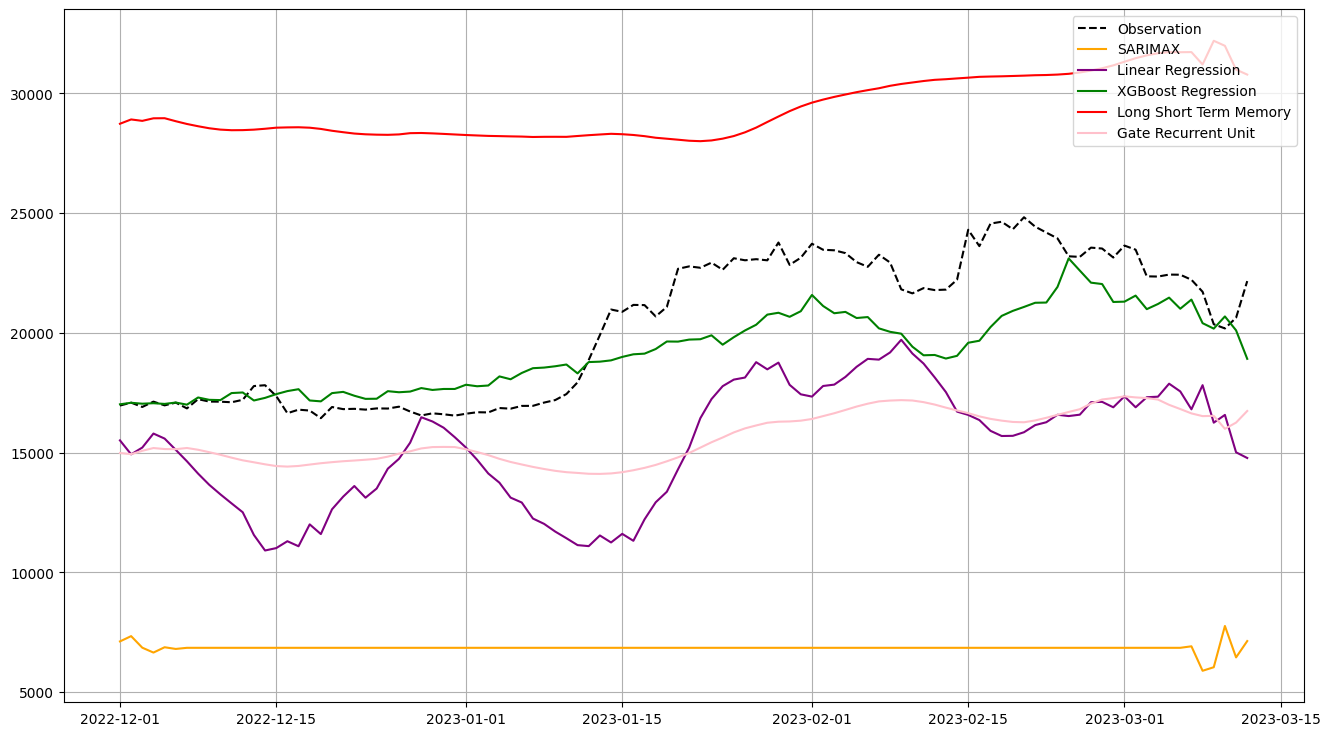

In [221]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.plot(df_avg['Y_test'], 'black', label='Observation', linestyle='dashed')
plt.plot(df_avg['Y_SARIMAX'], 'orange', label='SARIMAX')
plt.plot(df_avg["Y_LR"], 'purple', label=f'Linear Regression')
plt.plot(df_avg["Y_XGBR"], 'green', label=f'XGBoost Regression')
plt.plot(df_avg["Y_LSTM"], 'red', label=f'Long Short Term Memory')
plt.plot(df_avg["Y_GRU"], 'pink', label=f'Gate Recurrent Unit')
plt.legend()
plt.savefig(f'G:/My Drive/CNTMDT/_Final/Image/{T1}_{TF2}_1.png')